In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# TensorFlow imports
import numpy as np
import pickle as pkl
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.efficientnet import EfficientNetB0
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import GlobalMaxPooling2D

# Nearest Neighbors and utilities
from sklearn.neighbors import NearestNeighbors
import os
from numpy.linalg import norm


In [3]:
import os
print(os.getcwd())


/content


In [4]:
filenames = []
for file in os.listdir('/content'):
    filenames.append(os.path.join('/content',file))


In [5]:
import os

image_dir = '/content/drive/MyDrive/Data Sets/fashoin dataset/archive (1)/images'
filenames = []

for file in os.listdir(image_dir):
    filenames.append(os.path.join(image_dir, file))

print(filenames)

['/content/drive/MyDrive/Data Sets/fashoin dataset/archive (1)/images/10001.jpg', '/content/drive/MyDrive/Data Sets/fashoin dataset/archive (1)/images/10000.jpg', '/content/drive/MyDrive/Data Sets/fashoin dataset/archive (1)/images/10002.jpg', '/content/drive/MyDrive/Data Sets/fashoin dataset/archive (1)/images/10003.jpg', '/content/drive/MyDrive/Data Sets/fashoin dataset/archive (1)/images/10004.jpg', '/content/drive/MyDrive/Data Sets/fashoin dataset/archive (1)/images/10005.jpg', '/content/drive/MyDrive/Data Sets/fashoin dataset/archive (1)/images/10006.jpg', '/content/drive/MyDrive/Data Sets/fashoin dataset/archive (1)/images/10007.jpg', '/content/drive/MyDrive/Data Sets/fashoin dataset/archive (1)/images/10008.jpg', '/content/drive/MyDrive/Data Sets/fashoin dataset/archive (1)/images/10009.jpg', '/content/drive/MyDrive/Data Sets/fashoin dataset/archive (1)/images/10010.jpg', '/content/drive/MyDrive/Data Sets/fashoin dataset/archive (1)/images/10011.jpg', '/content/drive/MyDrive/Dat

In [6]:
len(filenames)

380

In [7]:
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.efficientnet import EfficientNetB0
from tensorflow.keras.layers import GlobalMaxPooling2D

# ResNet50
resnet_model = tf.keras.models.Sequential([
    ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3)),
    GlobalMaxPooling2D()
])

# InceptionV3
inception_model = tf.keras.models.Sequential([
    InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3)),
    GlobalMaxPooling2D()
])

# VGG16
vgg_model = tf.keras.models.Sequential([
    VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3)),
    GlobalMaxPooling2D()
])

# EfficientNetB0
efficientnet_model = tf.keras.models.Sequential([
    EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3)),
    GlobalMaxPooling2D()
])

# Summaries of all models
print("ResNet50 Model Summary:")
resnet_model.summary()

print("\nInceptionV3 Model Summary:")
inception_model.summary()

print("\nVGG16 Model Summary:")
vgg_model.summary()

print("\nEfficientNetB0 Model Summary:")
efficientnet_model.summary()


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
ResNet50 Model Summary:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 7, 7, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling2d                 │ (None, 2048)                │               0 │
│ (GlobalMaxPooling2D)                 │                             │                 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)


InceptionV3 Model Summary:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ inception_v3 (Functional)            │ (None, 5, 5, 2048)          │      21,802,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling2d_1               │ (None, 2048)                │               0 │
│ (GlobalMaxPooling2D)                 │                             │                 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,802,784 (83.17 MB)

 Trainable params: 21,768,352 (83.04 MB)

 Non-trainable params: 34,432 (134.50 KB)


VGG16 Model Summary:


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling2d_2               │ (None, 512)                 │               0 │
│ (GlobalMaxPooling2D)                 │                             │                 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)


EfficientNetB0 Model Summary:


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)          │ (None, 7, 7, 1280)          │       4,049,571 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling2d_3               │ (None, 1280)                │               0 │
│ (GlobalMaxPooling2D)                 │                             │                 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,049,571 (15.45 MB)

 Trainable params: 4,007,548 (15.29 MB)

 Non-trainable params: 42,023 (164.16 KB)

In [8]:
def extract_features_from_images(image_path, model):
    img = image.load_img(image_path, target_size=(224,224))
    img_array = image.img_to_array(img)
    img_expand_dim = np.expand_dims(img_array, axis=0)
    img_preprocess = preprocess_input(img_expand_dim)
    result = model.predict(img_preprocess).flatten()
    norm_result = result/norm(result)
    return norm_result

In [12]:
# You need to specify which model to use, for example ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
model = tf.keras.models.Sequential([
    ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3)),
    GlobalMaxPooling2D()
])
extract_features_from_images(filenames[0], model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


array([0.        , 0.03648942, 0.        , ..., 0.00997926, 0.02375533,
       0.0464991 ], dtype=float32)

In [13]:
image_features = []
for file in filenames[0:5]:
    image_features.append(extract_features_from_images(file, model))
image_features


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


[array([0.        , 0.03648942, 0.        , ..., 0.00997926, 0.02375533,
        0.0464991 ], dtype=float32),
 array([0.        , 0.01761617, 0.00171598, ..., 0.0124723 , 0.02726395,
        0.06899218], dtype=float32),
 array([0.        , 0.03642138, 0.00710439, ..., 0.00140775, 0.        ,
        0.05435042], dtype=float32),
 array([0.00232167, 0.05030543, 0.00747743, ..., 0.00346691, 0.03391024,
        0.04565723], dtype=float32),
 array([0.00306836, 0.06240454, 0.        , ..., 0.00170628, 0.02032895,
        0.05833264], dtype=float32)]

In [14]:
Image_features = pkl.dump(image_features, open('Images_features.pkl','wb'))

In [15]:
filenames = pkl.dump(filenames, open('filenames.pkl','wb'))

In [16]:
Image_features = pkl.load(open('Images_features.pkl','rb'))

In [17]:
filenames = pkl.load(open('filenames.pkl','rb'))

In [18]:
np.array(Image_features).shape

(5, 2048)

In [19]:
neighbors = NearestNeighbors(n_neighbors=6, algorithm='brute', metric='euclidean')

In [20]:
neighbors.fit(Image_features)

NearestNeighbors(algorithm='brute', metric='euclidean', n_neighbors=6)

In [21]:
import numpy as np
from sklearn.neighbors import NearestNeighbors

# Simulated dataset of feature vectors (replace with your actual feature vectors)
feature_vectors = np.random.rand(100, 2048)  # Example: 100 samples, 2048-dimensional vectors

# Simulated input image feature vector (replace with your actual feature vector)
input_image = np.random.rand(2048)

# Initialize Nearest Neighbors model
neighbors = NearestNeighbors(n_neighbors=5, algorithm='auto')  # Adjust n_neighbors as needed

# Fit the model
neighbors.fit(feature_vectors)

# Find nearest neighbors
distance, indices = neighbors.kneighbors([input_image])

# Print results
print("Distances:", distance)
print("Indices:", indices)


Distances: [[17.99754545 18.03534438 18.05955408 18.09825334 18.11845543]]
Indices: [[55 46 99 30 34]]


In [22]:
!pip install streamlit



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 47.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 66.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 7.2 MB/s eta 0:00:00


In [23]:
import streamlit as st
import os
from PIL import Image
import numpy as np
import pickle
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import ResNet50, InceptionV3, VGG16, EfficientNetB0
from tensorflow.keras.layers import GlobalMaxPooling2D
from tensorflow.keras.applications.resnet50 import preprocess_input as preprocess_resnet
from tensorflow.keras.applications.inception_v3 import preprocess_input as preprocess_inception
from tensorflow.keras.applications.vgg16 import preprocess_input as preprocess_vgg
from tensorflow.keras.applications.efficientnet import preprocess_input as preprocess_efficientnet
from sklearn.neighbors import NearestNeighbors
from numpy.linalg import norm

# Load the feature list and filenames (already pre-computed)
feature_list = np.array(pickle.load(open('Images_features.pkl', 'rb')))
filenames = pickle.load(open('filenames.pkl', 'rb'))

# Models initialization
def initialize_model(model_name):
    if model_name == 'ResNet50':
        model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
        model = tf.keras.models.Sequential([model, GlobalMaxPooling2D()])
        preprocess_input = preprocess_resnet
    elif model_name == 'InceptionV3':
        model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
        model = tf.keras.models.Sequential([model, GlobalMaxPooling2D()])
        preprocess_input = preprocess_inception
    elif model_name == 'VGG16':
        model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
        model = tf.keras.models.Sequential([model, GlobalMaxPooling2D()])
        preprocess_input = preprocess_vgg
    elif model_name == 'EfficientNet':
        model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
        model = tf.keras.models.Sequential([model, GlobalMaxPooling2D()])
        preprocess_input = preprocess_efficientnet
    return model, preprocess_input

# Function to extract features from the uploaded image
def feature_extraction(img_path, model, preprocess_input):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    expanded_img_array = np.expand_dims(img_array, axis=0)
    preprocessed_img = preprocess_input(expanded_img_array)
    result = model.predict(preprocessed_img).flatten()
    normalized_result = result / norm(result)
    return normalized_result

# Function to recommend similar images
def recommend(features, feature_list):
    neighbors = NearestNeighbors(n_neighbors=6, algorithm='brute', metric='euclidean')
    neighbors.fit(feature_list)
    distances, indices = neighbors.kneighbors([features])
    return indices

# Streamlit UI
st.title('Fashion Recommender System')

def save_uploaded_file(uploaded_file):
    try:
        with open(os.path.join('uploads', uploaded_file.name), 'wb') as f:
            f.write(uploaded_file.getbuffer())
        return 1
    except:
        return 0

# File upload widget
uploaded_file = st.file_uploader("Choose an image")
model_option = st.selectbox("Select Model", ['ResNet50', 'InceptionV3', 'VGG16', 'EfficientNet'])

if uploaded_file is not None:
    if save_uploaded_file(uploaded_file):
        # Display the uploaded image
        display_image = Image.open(uploaded_file)
        st.image(display_image)

        # Initialize the selected model and preprocessing function
        model, preprocess_input = initialize_model(model_option)

        # Feature extraction
        features = feature_extraction(os.path.join("uploads", uploaded_file.name), model, preprocess_input)

        # Recommendation
        indices = recommend(features, feature_list)

        # Display the recommended images
        col1, col2, col3, col4, col5 = st.columns(5)

        with col1:
            st.image(filenames[indices[0][0]])
        with col2:
            st.image(filenames[indices[0][1]])
        with col3:
            st.image(filenames[indices[0][2]])
        with col4:
            st.image(filenames[indices[0][3]])
        with col5:
            st.image(filenames[indices[0][4]])
    else:
        st.header("Some error occurred in file upload.")


2024-12-23 04:13:08.315 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-23 04:13:08.518 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2024-12-23 04:13:08.522 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-23 04:13:08.528 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-23 04:13:08.535 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-23 04:13:08.537 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-23 04:13:08.538 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-23 04:13:08.543 Thread 'MainThread': mi

In [24]:
import os
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import ResNet50, InceptionV3, VGG16, EfficientNetB0
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet_preprocess
from tensorflow.keras.applications.inception_v3 import preprocess_input as inception_preprocess
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg_preprocess
from tensorflow.keras.applications.efficientnet import preprocess_input as effnet_preprocess
from tqdm import tqdm

# Load pre-trained models
resnet_model = ResNet50(weights='imagenet', include_top=False, pooling='avg')
inception_model = InceptionV3(weights='imagenet', include_top=False, pooling='avg')
vgg_model = VGG16(weights='imagenet', include_top=False, pooling='avg')
effnet_model = EfficientNetB0(weights='imagenet', include_top=False, pooling='avg')  # EfficientNetB0

# Define preprocessing functions
def preprocess_resnet(image_path):
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    return resnet_preprocess(np.expand_dims(img_array, axis=0))

def preprocess_inception(image_path):
    img = image.load_img(image_path, target_size=(299, 299))  # Inception uses 299x299
    img_array = image.img_to_array(img)
    return inception_preprocess(np.expand_dims(img_array, axis=0))

def preprocess_vgg(image_path):
    img = image.load_img(image_path, target_size=(224, 224))  # VGG16 uses 224x224
    img_array = image.img_to_array(img)
    return vgg_preprocess(np.expand_dims(img_array, axis=0))

def preprocess_effnet(image_path):
    img = image.load_img(image_path, target_size=(224, 224))  # EfficientNetB0 uses 224x224
    img_array = image.img_to_array(img)
    return effnet_preprocess(np.expand_dims(img_array, axis=0))

# Function to extract features for a given model
def extract_features(model, preprocess_fn, image_paths):
    features = []
    for img_path in tqdm(image_paths, desc=f"Extracting features using {model.name}"):
        preprocessed_img = preprocess_fn(img_path)
        feature = model.predict(preprocessed_img)
        features.append(feature.flatten())  # Flatten the feature map to a 1D vector
    return np.array(features)

# Load your dataset (assuming images are in a folder called 'dataset')
dataset_dir = '/content/drive/MyDrive/Data Sets/fashoin dataset/archive (1)/images'  # Replace with your dataset folder path
image_paths = [os.path.join(dataset_dir, fname) for fname in os.listdir(dataset_dir) if fname.endswith(('jpg', 'jpeg', 'png'))]

# Extract features for each model
resnet_features = extract_features(resnet_model, preprocess_resnet, image_paths)
inception_features = extract_features(inception_model, preprocess_inception, image_paths)
vgg_features = extract_features(vgg_model, preprocess_vgg, image_paths)
effnet_features = extract_features(effnet_model, preprocess_effnet, image_paths)

# Save the extracted features
np.save('resnet_features.npy', resnet_features)
np.save('inception_features.npy', inception_features)
np.save('vgg_features.npy', vgg_features)
np.save('effnet_features.npy', effnet_features)

# Optional: You can combine all features into a single array for further processing
all_features = np.concatenate([resnet_features, inception_features, vgg_features, effnet_features], axis=1)
np.save('all_features.npy', all_features)


Extracting features using resnet50:   0%|          | 0/380 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


Extracting features using resnet50:   0%|          | 1/380 [00:02<16:27,  2.61s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step


Extracting features using resnet50:   1%|          | 2/380 [00:02<08:05,  1.28s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step


Extracting features using resnet50:   1%|          | 3/380 [00:03<05:26,  1.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 751ms/step


Extracting features using resnet50:   1%|          | 4/380 [00:04<05:36,  1.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


Extracting features using resnet50:   1%|▏         | 5/380 [00:07<10:54,  1.75s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


Extracting features using resnet50:   2%|▏         | 6/380 [00:07<07:41,  1.24s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


Extracting features using resnet50:   2%|▏         | 7/380 [00:08<05:44,  1.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


Extracting features using resnet50:   2%|▏         | 8/380 [00:08<04:20,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


Extracting features using resnet50:   2%|▏         | 9/380 [00:08<03:26,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


Extracting features using resnet50:   3%|▎         | 10/380 [00:08<02:49,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


Extracting features using resnet50:   3%|▎         | 11/380 [00:08<02:24,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


Extracting features using resnet50:   3%|▎         | 12/380 [00:09<02:07,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


Extracting features using resnet50:   3%|▎         | 13/380 [00:09<01:54,  3.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


Extracting features using resnet50:   4%|▎         | 14/380 [00:09<01:44,  3.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


Extracting features using resnet50:   4%|▍         | 15/380 [00:09<01:39,  3.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


Extracting features using resnet50:   4%|▍         | 16/380 [00:10<01:34,  3.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


Extracting features using resnet50:   4%|▍         | 17/380 [00:10<01:30,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


Extracting features using resnet50:   5%|▍         | 18/380 [00:10<01:27,  4.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


Extracting features using resnet50:   5%|▌         | 19/380 [00:10<01:34,  3.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


Extracting features using resnet50:   5%|▌         | 20/380 [00:11<01:31,  3.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


Extracting features using resnet50:   6%|▌         | 21/380 [00:11<01:28,  4.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


Extracting features using resnet50:   6%|▌         | 22/380 [00:11<01:26,  4.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


Extracting features using resnet50:   6%|▌         | 23/380 [00:11<01:28,  4.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


Extracting features using resnet50:   6%|▋         | 24/380 [00:12<01:25,  4.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


Extracting features using resnet50:   7%|▋         | 25/380 [00:12<01:25,  4.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


Extracting features using resnet50:   7%|▋         | 26/380 [00:12<01:23,  4.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


Extracting features using resnet50:   7%|▋         | 27/380 [00:12<01:23,  4.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


Extracting features using resnet50:   7%|▋         | 28/380 [00:13<01:23,  4.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


Extracting features using resnet50:   8%|▊         | 29/380 [00:13<01:21,  4.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


Extracting features using resnet50:   8%|▊         | 30/380 [00:13<01:20,  4.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


Extracting features using resnet50:   8%|▊         | 31/380 [00:13<01:18,  4.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


Extracting features using resnet50:   8%|▊         | 32/380 [00:13<01:21,  4.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


Extracting features using resnet50:   9%|▊         | 33/380 [00:14<01:21,  4.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


Extracting features using resnet50:   9%|▉         | 34/380 [00:14<01:20,  4.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


Extracting features using resnet50:   9%|▉         | 35/380 [00:14<01:18,  4.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


Extracting features using resnet50:   9%|▉         | 36/380 [00:14<01:20,  4.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


Extracting features using resnet50:  10%|▉         | 37/380 [00:15<01:19,  4.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


Extracting features using resnet50:  10%|█         | 38/380 [00:15<01:19,  4.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


Extracting features using resnet50:  10%|█         | 39/380 [00:15<01:17,  4.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


Extracting features using resnet50:  11%|█         | 40/380 [00:15<01:17,  4.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


Extracting features using resnet50:  11%|█         | 41/380 [00:16<01:19,  4.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


Extracting features using resnet50:  11%|█         | 42/380 [00:16<01:19,  4.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


Extracting features using resnet50:  11%|█▏        | 43/380 [00:16<01:18,  4.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


Extracting features using resnet50:  12%|█▏        | 44/380 [00:16<01:17,  4.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


Extracting features using resnet50:  12%|█▏        | 45/380 [00:16<01:19,  4.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


Extracting features using resnet50:  12%|█▏        | 46/380 [00:17<01:18,  4.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


Extracting features using resnet50:  12%|█▏        | 47/380 [00:17<01:23,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step


Extracting features using resnet50:  13%|█▎        | 48/380 [00:17<01:34,  3.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step


Extracting features using resnet50:  13%|█▎        | 49/380 [00:18<01:44,  3.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step


Extracting features using resnet50:  13%|█▎        | 50/380 [00:18<01:49,  3.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step


Extracting features using resnet50:  13%|█▎        | 51/380 [00:18<01:53,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


Extracting features using resnet50:  14%|█▎        | 52/380 [00:19<01:52,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step


Extracting features using resnet50:  14%|█▍        | 53/380 [00:19<01:57,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step


Extracting features using resnet50:  14%|█▍        | 54/380 [00:20<01:59,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step


Extracting features using resnet50:  14%|█▍        | 55/380 [00:20<02:00,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step


Extracting features using resnet50:  15%|█▍        | 56/380 [00:20<02:01,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step


Extracting features using resnet50:  15%|█▌        | 57/380 [00:21<02:05,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step


Extracting features using resnet50:  15%|█▌        | 58/380 [00:21<02:05,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step


Extracting features using resnet50:  16%|█▌        | 59/380 [00:22<02:07,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step


Extracting features using resnet50:  16%|█▌        | 60/380 [00:22<02:05,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step


Extracting features using resnet50:  16%|█▌        | 61/380 [00:22<02:02,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step


Extracting features using resnet50:  16%|█▋        | 62/380 [00:23<01:59,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step


Extracting features using resnet50:  17%|█▋        | 63/380 [00:23<01:58,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step


Extracting features using resnet50:  17%|█▋        | 64/380 [00:23<01:59,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


Extracting features using resnet50:  17%|█▋        | 65/380 [00:24<01:46,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


Extracting features using resnet50:  17%|█▋        | 66/380 [00:24<01:37,  3.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


Extracting features using resnet50:  18%|█▊        | 67/380 [00:24<01:29,  3.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


Extracting features using resnet50:  18%|█▊        | 68/380 [00:24<01:24,  3.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


Extracting features using resnet50:  18%|█▊        | 69/380 [00:25<01:20,  3.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


Extracting features using resnet50:  18%|█▊        | 70/380 [00:25<01:18,  3.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


Extracting features using resnet50:  19%|█▊        | 71/380 [00:25<01:15,  4.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


Extracting features using resnet50:  19%|█▉        | 72/380 [00:25<01:15,  4.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


Extracting features using resnet50:  19%|█▉        | 73/380 [00:26<01:13,  4.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


Extracting features using resnet50:  19%|█▉        | 74/380 [00:26<01:11,  4.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


Extracting features using resnet50:  20%|█▉        | 75/380 [00:26<01:11,  4.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


Extracting features using resnet50:  20%|██        | 76/380 [00:26<01:11,  4.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


Extracting features using resnet50:  20%|██        | 77/380 [00:27<01:12,  4.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


Extracting features using resnet50:  21%|██        | 78/380 [00:27<01:10,  4.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


Extracting features using resnet50:  21%|██        | 79/380 [00:27<01:11,  4.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


Extracting features using resnet50:  21%|██        | 80/380 [00:27<01:10,  4.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


Extracting features using resnet50:  21%|██▏       | 81/380 [00:27<01:10,  4.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


Extracting features using resnet50:  22%|██▏       | 82/380 [00:28<01:10,  4.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


Extracting features using resnet50:  22%|██▏       | 83/380 [00:28<01:10,  4.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


Extracting features using resnet50:  22%|██▏       | 84/380 [00:28<01:09,  4.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


Extracting features using resnet50:  22%|██▏       | 85/380 [00:28<01:09,  4.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


Extracting features using resnet50:  23%|██▎       | 86/380 [00:29<01:08,  4.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


Extracting features using resnet50:  23%|██▎       | 87/380 [00:29<01:07,  4.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


Extracting features using resnet50:  23%|██▎       | 88/380 [00:29<01:08,  4.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


Extracting features using resnet50:  23%|██▎       | 89/380 [00:29<01:08,  4.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


Extracting features using resnet50:  24%|██▎       | 90/380 [00:30<01:08,  4.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


Extracting features using resnet50:  24%|██▍       | 91/380 [00:30<01:06,  4.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


Extracting features using resnet50:  24%|██▍       | 92/380 [00:30<01:08,  4.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


Extracting features using resnet50:  24%|██▍       | 93/380 [00:30<01:07,  4.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


Extracting features using resnet50:  25%|██▍       | 94/380 [00:31<01:08,  4.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


Extracting features using resnet50:  25%|██▌       | 95/380 [00:31<01:08,  4.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


Extracting features using resnet50:  25%|██▌       | 96/380 [00:31<01:08,  4.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


Extracting features using resnet50:  26%|██▌       | 97/380 [00:31<01:08,  4.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


Extracting features using resnet50:  26%|██▌       | 98/380 [00:32<01:08,  4.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


Extracting features using resnet50:  26%|██▌       | 99/380 [00:32<01:08,  4.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


Extracting features using resnet50:  26%|██▋       | 100/380 [00:32<01:06,  4.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


Extracting features using resnet50:  27%|██▋       | 101/380 [00:32<01:06,  4.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


Extracting features using resnet50:  27%|██▋       | 102/380 [00:32<01:05,  4.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


Extracting features using resnet50:  27%|██▋       | 103/380 [00:33<01:04,  4.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


Extracting features using resnet50:  27%|██▋       | 104/380 [00:33<01:03,  4.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


Extracting features using resnet50:  28%|██▊       | 105/380 [00:33<01:04,  4.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


Extracting features using resnet50:  28%|██▊       | 106/380 [00:33<01:05,  4.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


Extracting features using resnet50:  28%|██▊       | 107/380 [00:34<01:07,  4.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step


Extracting features using resnet50:  28%|██▊       | 108/380 [00:34<01:16,  3.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step


Extracting features using resnet50:  29%|██▊       | 109/380 [00:35<01:51,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step


Extracting features using resnet50:  29%|██▉       | 110/380 [00:35<01:47,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step


Extracting features using resnet50:  29%|██▉       | 111/380 [00:35<01:45,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step


Extracting features using resnet50:  29%|██▉       | 112/380 [00:36<01:43,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step


Extracting features using resnet50:  30%|██▉       | 113/380 [00:36<01:46,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step


Extracting features using resnet50:  30%|███       | 114/380 [00:37<01:44,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step


Extracting features using resnet50:  30%|███       | 115/380 [00:37<01:42,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step


Extracting features using resnet50:  31%|███       | 116/380 [00:37<01:41,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step


Extracting features using resnet50:  31%|███       | 117/380 [00:38<01:45,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step


Extracting features using resnet50:  31%|███       | 118/380 [00:38<01:42,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step


Extracting features using resnet50:  31%|███▏      | 119/380 [00:39<01:41,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step


Extracting features using resnet50:  32%|███▏      | 120/380 [00:39<01:38,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


Extracting features using resnet50:  32%|███▏      | 121/380 [00:39<01:33,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


Extracting features using resnet50:  32%|███▏      | 122/380 [00:40<01:25,  3.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


Extracting features using resnet50:  32%|███▏      | 123/380 [00:40<01:17,  3.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


Extracting features using resnet50:  33%|███▎      | 124/380 [00:40<01:11,  3.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


Extracting features using resnet50:  33%|███▎      | 125/380 [00:40<01:07,  3.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


Extracting features using resnet50:  33%|███▎      | 126/380 [00:41<01:09,  3.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


Extracting features using resnet50:  33%|███▎      | 127/380 [00:41<01:05,  3.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


Extracting features using resnet50:  34%|███▎      | 128/380 [00:41<01:04,  3.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


Extracting features using resnet50:  34%|███▍      | 129/380 [00:41<01:03,  3.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


Extracting features using resnet50:  34%|███▍      | 130/380 [00:41<01:02,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


Extracting features using resnet50:  34%|███▍      | 131/380 [00:42<01:01,  4.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


Extracting features using resnet50:  35%|███▍      | 132/380 [00:42<01:00,  4.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


Extracting features using resnet50:  35%|███▌      | 133/380 [00:42<00:59,  4.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


Extracting features using resnet50:  35%|███▌      | 134/380 [00:42<00:59,  4.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


Extracting features using resnet50:  36%|███▌      | 135/380 [00:43<00:59,  4.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


Extracting features using resnet50:  36%|███▌      | 136/380 [00:43<00:57,  4.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


Extracting features using resnet50:  36%|███▌      | 137/380 [00:43<00:57,  4.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


Extracting features using resnet50:  36%|███▋      | 138/380 [00:43<00:56,  4.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


Extracting features using resnet50:  37%|███▋      | 139/380 [00:44<00:56,  4.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


Extracting features using resnet50:  37%|███▋      | 140/380 [00:44<00:57,  4.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


Extracting features using resnet50:  37%|███▋      | 141/380 [00:44<00:56,  4.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


Extracting features using resnet50:  37%|███▋      | 142/380 [00:44<00:54,  4.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


Extracting features using resnet50:  38%|███▊      | 143/380 [00:45<00:55,  4.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


Extracting features using resnet50:  38%|███▊      | 144/380 [00:45<00:55,  4.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


Extracting features using resnet50:  38%|███▊      | 145/380 [00:45<00:54,  4.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


Extracting features using resnet50:  38%|███▊      | 146/380 [00:45<00:54,  4.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


Extracting features using resnet50:  39%|███▊      | 147/380 [00:46<01:03,  3.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


Extracting features using resnet50:  39%|███▉      | 148/380 [00:46<01:00,  3.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


Extracting features using resnet50:  39%|███▉      | 149/380 [00:46<00:57,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


Extracting features using resnet50:  39%|███▉      | 150/380 [00:46<00:55,  4.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


Extracting features using resnet50:  40%|███▉      | 151/380 [00:47<00:55,  4.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


Extracting features using resnet50:  40%|████      | 152/380 [00:47<00:55,  4.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


Extracting features using resnet50:  40%|████      | 153/380 [00:47<00:54,  4.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


Extracting features using resnet50:  41%|████      | 154/380 [00:47<00:53,  4.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


Extracting features using resnet50:  41%|████      | 155/380 [00:47<00:53,  4.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


Extracting features using resnet50:  41%|████      | 156/380 [00:48<00:52,  4.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


Extracting features using resnet50:  41%|████▏     | 157/380 [00:48<00:52,  4.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


Extracting features using resnet50:  42%|████▏     | 158/380 [00:48<00:51,  4.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


Extracting features using resnet50:  42%|████▏     | 159/380 [00:48<00:51,  4.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


Extracting features using resnet50:  42%|████▏     | 160/380 [00:49<00:50,  4.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


Extracting features using resnet50:  42%|████▏     | 161/380 [00:49<00:50,  4.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


Extracting features using resnet50:  43%|████▎     | 162/380 [00:49<00:50,  4.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


Extracting features using resnet50:  43%|████▎     | 163/380 [00:49<00:55,  3.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step


Extracting features using resnet50:  43%|████▎     | 164/380 [00:50<01:03,  3.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step


Extracting features using resnet50:  43%|████▎     | 165/380 [00:50<01:08,  3.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step


Extracting features using resnet50:  44%|████▎     | 166/380 [00:51<01:13,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step


Extracting features using resnet50:  44%|████▍     | 167/380 [00:51<01:15,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step


Extracting features using resnet50:  44%|████▍     | 168/380 [00:51<01:18,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step


Extracting features using resnet50:  44%|████▍     | 169/380 [00:52<01:20,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step


Extracting features using resnet50:  45%|████▍     | 170/380 [00:52<01:20,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step


Extracting features using resnet50:  45%|████▌     | 171/380 [00:53<01:22,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step


Extracting features using resnet50:  45%|████▌     | 172/380 [00:53<01:19,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step


Extracting features using resnet50:  46%|████▌     | 173/380 [00:53<01:19,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step


Extracting features using resnet50:  46%|████▌     | 174/380 [00:54<01:19,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step


Extracting features using resnet50:  46%|████▌     | 175/380 [00:54<01:18,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step


Extracting features using resnet50:  46%|████▋     | 176/380 [00:54<01:17,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step


Extracting features using resnet50:  47%|████▋     | 177/380 [00:55<01:15,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step


Extracting features using resnet50:  47%|████▋     | 178/380 [00:55<01:15,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


Extracting features using resnet50:  47%|████▋     | 179/380 [00:55<01:11,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


Extracting features using resnet50:  47%|████▋     | 180/380 [00:56<01:03,  3.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


Extracting features using resnet50:  48%|████▊     | 181/380 [00:56<00:57,  3.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


Extracting features using resnet50:  48%|████▊     | 182/380 [00:56<00:54,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


Extracting features using resnet50:  48%|████▊     | 183/380 [00:56<00:52,  3.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


Extracting features using resnet50:  48%|████▊     | 184/380 [00:57<00:49,  3.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


Extracting features using resnet50:  49%|████▊     | 185/380 [00:57<00:48,  4.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


Extracting features using resnet50:  49%|████▉     | 186/380 [00:57<00:47,  4.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


Extracting features using resnet50:  49%|████▉     | 187/380 [00:57<00:47,  4.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


Extracting features using resnet50:  49%|████▉     | 188/380 [00:58<00:46,  4.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


Extracting features using resnet50:  50%|████▉     | 189/380 [00:58<00:45,  4.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


Extracting features using resnet50:  50%|█████     | 190/380 [00:58<00:45,  4.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


Extracting features using resnet50:  50%|█████     | 191/380 [00:58<00:46,  4.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


Extracting features using resnet50:  51%|█████     | 192/380 [00:59<00:46,  4.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


Extracting features using resnet50:  51%|█████     | 193/380 [00:59<00:45,  4.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


Extracting features using resnet50:  51%|█████     | 194/380 [00:59<00:44,  4.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


Extracting features using resnet50:  51%|█████▏    | 195/380 [00:59<00:44,  4.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


Extracting features using resnet50:  52%|█████▏    | 196/380 [01:00<00:44,  4.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


Extracting features using resnet50:  52%|█████▏    | 197/380 [01:00<00:44,  4.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


Extracting features using resnet50:  52%|█████▏    | 198/380 [01:00<00:42,  4.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


Extracting features using resnet50:  52%|█████▏    | 199/380 [01:00<00:42,  4.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


Extracting features using resnet50:  53%|█████▎    | 200/380 [01:00<00:43,  4.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


Extracting features using resnet50:  53%|█████▎    | 201/380 [01:01<00:42,  4.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


Extracting features using resnet50:  53%|█████▎    | 202/380 [01:01<00:42,  4.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


Extracting features using resnet50:  53%|█████▎    | 203/380 [01:01<00:41,  4.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


Extracting features using resnet50:  54%|█████▎    | 204/380 [01:01<00:43,  4.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


Extracting features using resnet50:  54%|█████▍    | 205/380 [01:02<00:42,  4.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


Extracting features using resnet50:  54%|█████▍    | 206/380 [01:02<00:42,  4.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


Extracting features using resnet50:  54%|█████▍    | 207/380 [01:02<00:41,  4.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


Extracting features using resnet50:  55%|█████▍    | 208/380 [01:02<00:43,  3.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


Extracting features using resnet50:  55%|█████▌    | 209/380 [01:03<00:41,  4.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


Extracting features using resnet50:  55%|█████▌    | 210/380 [01:03<00:40,  4.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


Extracting features using resnet50:  56%|█████▌    | 211/380 [01:03<00:40,  4.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


Extracting features using resnet50:  56%|█████▌    | 212/380 [01:03<00:40,  4.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


Extracting features using resnet50:  56%|█████▌    | 213/380 [01:04<00:39,  4.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


Extracting features using resnet50:  56%|█████▋    | 214/380 [01:04<00:39,  4.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


Extracting features using resnet50:  57%|█████▋    | 215/380 [01:04<00:39,  4.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


Extracting features using resnet50:  57%|█████▋    | 216/380 [01:04<00:39,  4.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


Extracting features using resnet50:  57%|█████▋    | 217/380 [01:05<00:39,  4.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


Extracting features using resnet50:  57%|█████▋    | 218/380 [01:05<00:38,  4.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


Extracting features using resnet50:  58%|█████▊    | 219/380 [01:05<00:37,  4.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


Extracting features using resnet50:  58%|█████▊    | 220/380 [01:05<00:37,  4.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step


Extracting features using resnet50:  58%|█████▊    | 221/380 [01:06<00:41,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step


Extracting features using resnet50:  58%|█████▊    | 222/380 [01:06<00:45,  3.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step


Extracting features using resnet50:  59%|█████▊    | 223/380 [01:06<00:49,  3.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step


Extracting features using resnet50:  59%|█████▉    | 224/380 [01:07<00:52,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step


Extracting features using resnet50:  59%|█████▉    | 225/380 [01:07<00:55,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step


Extracting features using resnet50:  59%|█████▉    | 226/380 [01:08<00:56,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 707ms/step


Extracting features using resnet50:  60%|█████▉    | 227/380 [01:08<01:16,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step


Extracting features using resnet50:  60%|██████    | 228/380 [01:09<01:28,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 690ms/step


Extracting features using resnet50:  60%|██████    | 229/380 [01:10<01:36,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


Extracting features using resnet50:  61%|██████    | 230/380 [01:11<01:45,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 819ms/step


Extracting features using resnet50:  61%|██████    | 231/380 [01:12<01:54,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


Extracting features using resnet50:  61%|██████    | 232/380 [01:12<01:38,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


Extracting features using resnet50:  61%|██████▏   | 233/380 [01:12<01:18,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


Extracting features using resnet50:  62%|██████▏   | 234/380 [01:13<01:05,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


Extracting features using resnet50:  62%|██████▏   | 235/380 [01:13<00:55,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


Extracting features using resnet50:  62%|██████▏   | 236/380 [01:13<00:49,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


Extracting features using resnet50:  62%|██████▏   | 237/380 [01:13<00:43,  3.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


Extracting features using resnet50:  63%|██████▎   | 238/380 [01:14<00:41,  3.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


Extracting features using resnet50:  63%|██████▎   | 239/380 [01:14<00:38,  3.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


Extracting features using resnet50:  63%|██████▎   | 240/380 [01:14<00:36,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


Extracting features using resnet50:  63%|██████▎   | 241/380 [01:14<00:35,  3.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


Extracting features using resnet50:  64%|██████▎   | 242/380 [01:14<00:34,  4.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


Extracting features using resnet50:  64%|██████▍   | 243/380 [01:15<00:32,  4.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


Extracting features using resnet50:  64%|██████▍   | 244/380 [01:15<00:32,  4.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


Extracting features using resnet50:  64%|██████▍   | 245/380 [01:15<00:31,  4.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


Extracting features using resnet50:  65%|██████▍   | 246/380 [01:15<00:31,  4.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


Extracting features using resnet50:  65%|██████▌   | 247/380 [01:16<00:31,  4.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


Extracting features using resnet50:  65%|██████▌   | 248/380 [01:16<00:31,  4.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


Extracting features using resnet50:  66%|██████▌   | 249/380 [01:16<00:31,  4.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


Extracting features using resnet50:  66%|██████▌   | 250/380 [01:16<00:31,  4.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


Extracting features using resnet50:  66%|██████▌   | 251/380 [01:17<00:31,  4.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


Extracting features using resnet50:  66%|██████▋   | 252/380 [01:17<00:30,  4.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


Extracting features using resnet50:  67%|██████▋   | 253/380 [01:17<00:30,  4.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


Extracting features using resnet50:  67%|██████▋   | 254/380 [01:17<00:30,  4.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


Extracting features using resnet50:  67%|██████▋   | 255/380 [01:18<00:30,  4.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


Extracting features using resnet50:  67%|██████▋   | 256/380 [01:18<00:29,  4.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


Extracting features using resnet50:  68%|██████▊   | 257/380 [01:18<00:28,  4.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


Extracting features using resnet50:  68%|██████▊   | 258/380 [01:18<00:28,  4.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


Extracting features using resnet50:  68%|██████▊   | 259/380 [01:18<00:28,  4.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


Extracting features using resnet50:  68%|██████▊   | 260/380 [01:19<00:33,  3.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


Extracting features using resnet50:  69%|██████▊   | 261/380 [01:19<00:31,  3.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


Extracting features using resnet50:  69%|██████▉   | 262/380 [01:19<00:30,  3.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


Extracting features using resnet50:  69%|██████▉   | 263/380 [01:20<00:29,  3.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


Extracting features using resnet50:  69%|██████▉   | 264/380 [01:20<00:28,  4.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


Extracting features using resnet50:  70%|██████▉   | 265/380 [01:20<00:27,  4.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


Extracting features using resnet50:  70%|███████   | 266/380 [01:20<00:27,  4.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


Extracting features using resnet50:  70%|███████   | 267/380 [01:20<00:27,  4.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


Extracting features using resnet50:  71%|███████   | 268/380 [01:21<00:26,  4.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


Extracting features using resnet50:  71%|███████   | 269/380 [01:21<00:26,  4.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


Extracting features using resnet50:  71%|███████   | 270/380 [01:21<00:25,  4.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


Extracting features using resnet50:  71%|███████▏  | 271/380 [01:21<00:25,  4.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


Extracting features using resnet50:  72%|███████▏  | 272/380 [01:22<00:25,  4.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


Extracting features using resnet50:  72%|███████▏  | 273/380 [01:22<00:25,  4.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step


Extracting features using resnet50:  72%|███████▏  | 274/380 [01:22<00:29,  3.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step


Extracting features using resnet50:  72%|███████▏  | 275/380 [01:23<00:33,  3.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step


Extracting features using resnet50:  73%|███████▎  | 276/380 [01:23<00:35,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step


Extracting features using resnet50:  73%|███████▎  | 277/380 [01:23<00:35,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step


Extracting features using resnet50:  73%|███████▎  | 278/380 [01:24<00:36,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step


Extracting features using resnet50:  73%|███████▎  | 279/380 [01:24<00:36,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step


Extracting features using resnet50:  74%|███████▎  | 280/380 [01:25<00:36,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step


Extracting features using resnet50:  74%|███████▍  | 281/380 [01:25<00:36,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step


Extracting features using resnet50:  74%|███████▍  | 282/380 [01:25<00:35,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step


Extracting features using resnet50:  74%|███████▍  | 283/380 [01:26<00:35,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step


Extracting features using resnet50:  75%|███████▍  | 284/380 [01:26<00:36,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step


Extracting features using resnet50:  75%|███████▌  | 285/380 [01:27<00:37,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step


Extracting features using resnet50:  75%|███████▌  | 286/380 [01:27<00:36,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step


Extracting features using resnet50:  76%|███████▌  | 287/380 [01:27<00:35,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


Extracting features using resnet50:  76%|███████▌  | 288/380 [01:28<00:31,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


Extracting features using resnet50:  76%|███████▌  | 289/380 [01:28<00:28,  3.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


Extracting features using resnet50:  76%|███████▋  | 290/380 [01:28<00:25,  3.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


Extracting features using resnet50:  77%|███████▋  | 291/380 [01:28<00:23,  3.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


Extracting features using resnet50:  77%|███████▋  | 292/380 [01:28<00:23,  3.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


Extracting features using resnet50:  77%|███████▋  | 293/380 [01:29<00:22,  3.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


Extracting features using resnet50:  77%|███████▋  | 294/380 [01:29<00:21,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


Extracting features using resnet50:  78%|███████▊  | 295/380 [01:29<00:20,  4.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


Extracting features using resnet50:  78%|███████▊  | 296/380 [01:29<00:20,  4.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


Extracting features using resnet50:  78%|███████▊  | 297/380 [01:30<00:20,  4.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


Extracting features using resnet50:  78%|███████▊  | 298/380 [01:30<00:19,  4.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


Extracting features using resnet50:  79%|███████▊  | 299/380 [01:30<00:19,  4.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


Extracting features using resnet50:  79%|███████▉  | 300/380 [01:30<00:19,  4.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


Extracting features using resnet50:  79%|███████▉  | 301/380 [01:31<00:18,  4.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


Extracting features using resnet50:  79%|███████▉  | 302/380 [01:31<00:18,  4.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


Extracting features using resnet50:  80%|███████▉  | 303/380 [01:31<00:18,  4.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


Extracting features using resnet50:  80%|████████  | 304/380 [01:31<00:17,  4.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


Extracting features using resnet50:  80%|████████  | 305/380 [01:32<00:17,  4.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


Extracting features using resnet50:  81%|████████  | 306/380 [01:32<00:17,  4.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


Extracting features using resnet50:  81%|████████  | 307/380 [01:32<00:17,  4.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


Extracting features using resnet50:  81%|████████  | 308/380 [01:32<00:17,  4.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


Extracting features using resnet50:  81%|████████▏ | 309/380 [01:32<00:17,  4.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


Extracting features using resnet50:  82%|████████▏ | 310/380 [01:33<00:17,  4.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


Extracting features using resnet50:  82%|████████▏ | 311/380 [01:33<00:17,  4.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


Extracting features using resnet50:  82%|████████▏ | 312/380 [01:33<00:16,  4.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


Extracting features using resnet50:  82%|████████▏ | 313/380 [01:34<00:16,  3.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


Extracting features using resnet50:  83%|████████▎ | 314/380 [01:34<00:16,  4.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


Extracting features using resnet50:  83%|████████▎ | 315/380 [01:34<00:15,  4.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


Extracting features using resnet50:  83%|████████▎ | 316/380 [01:34<00:15,  4.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


Extracting features using resnet50:  83%|████████▎ | 317/380 [01:34<00:15,  4.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


Extracting features using resnet50:  84%|████████▎ | 318/380 [01:35<00:14,  4.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


Extracting features using resnet50:  84%|████████▍ | 319/380 [01:35<00:14,  4.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


Extracting features using resnet50:  84%|████████▍ | 320/380 [01:35<00:14,  4.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


Extracting features using resnet50:  84%|████████▍ | 321/380 [01:35<00:14,  4.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


Extracting features using resnet50:  85%|████████▍ | 322/380 [01:36<00:13,  4.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


Extracting features using resnet50:  85%|████████▌ | 323/380 [01:36<00:13,  4.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


Extracting features using resnet50:  85%|████████▌ | 324/380 [01:36<00:13,  4.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


Extracting features using resnet50:  86%|████████▌ | 325/380 [01:36<00:13,  4.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


Extracting features using resnet50:  86%|████████▌ | 326/380 [01:37<00:12,  4.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


Extracting features using resnet50:  86%|████████▌ | 327/380 [01:37<00:12,  4.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


Extracting features using resnet50:  86%|████████▋ | 328/380 [01:37<00:12,  4.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


Extracting features using resnet50:  87%|████████▋ | 329/380 [01:37<00:12,  4.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step


Extracting features using resnet50:  87%|████████▋ | 330/380 [01:38<00:14,  3.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step


Extracting features using resnet50:  87%|████████▋ | 331/380 [01:38<00:15,  3.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step


Extracting features using resnet50:  87%|████████▋ | 332/380 [01:39<00:16,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step


Extracting features using resnet50:  88%|████████▊ | 333/380 [01:39<00:16,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step


Extracting features using resnet50:  88%|████████▊ | 334/380 [01:39<00:16,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step


Extracting features using resnet50:  88%|████████▊ | 335/380 [01:40<00:16,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step


Extracting features using resnet50:  88%|████████▊ | 336/380 [01:40<00:15,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step


Extracting features using resnet50:  89%|████████▊ | 337/380 [01:40<00:15,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step


Extracting features using resnet50:  89%|████████▉ | 338/380 [01:41<00:15,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step


Extracting features using resnet50:  89%|████████▉ | 339/380 [01:41<00:15,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step


Extracting features using resnet50:  89%|████████▉ | 340/380 [01:42<00:15,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step


Extracting features using resnet50:  90%|████████▉ | 341/380 [01:42<00:15,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step


Extracting features using resnet50:  90%|█████████ | 342/380 [01:42<00:15,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step


Extracting features using resnet50:  90%|█████████ | 343/380 [01:43<00:14,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


Extracting features using resnet50:  91%|█████████ | 344/380 [01:43<00:13,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


Extracting features using resnet50:  91%|█████████ | 345/380 [01:43<00:11,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


Extracting features using resnet50:  91%|█████████ | 346/380 [01:44<00:10,  3.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


Extracting features using resnet50:  91%|█████████▏| 347/380 [01:44<00:09,  3.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


Extracting features using resnet50:  92%|█████████▏| 348/380 [01:44<00:08,  3.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


Extracting features using resnet50:  92%|█████████▏| 349/380 [01:44<00:08,  3.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


Extracting features using resnet50:  92%|█████████▏| 350/380 [01:45<00:07,  3.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


Extracting features using resnet50:  92%|█████████▏| 351/380 [01:45<00:07,  3.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


Extracting features using resnet50:  93%|█████████▎| 352/380 [01:45<00:06,  4.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


Extracting features using resnet50:  93%|█████████▎| 353/380 [01:45<00:06,  4.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


Extracting features using resnet50:  93%|█████████▎| 354/380 [01:46<00:06,  4.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


Extracting features using resnet50:  93%|█████████▎| 355/380 [01:46<00:05,  4.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


Extracting features using resnet50:  94%|█████████▎| 356/380 [01:46<00:05,  4.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


Extracting features using resnet50:  94%|█████████▍| 357/380 [01:46<00:05,  4.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


Extracting features using resnet50:  94%|█████████▍| 358/380 [01:46<00:05,  4.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


Extracting features using resnet50:  94%|█████████▍| 359/380 [01:47<00:04,  4.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


Extracting features using resnet50:  95%|█████████▍| 360/380 [01:47<00:04,  4.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


Extracting features using resnet50:  95%|█████████▌| 361/380 [01:47<00:04,  4.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


Extracting features using resnet50:  95%|█████████▌| 362/380 [01:47<00:04,  4.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


Extracting features using resnet50:  96%|█████████▌| 363/380 [01:48<00:04,  4.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


Extracting features using resnet50:  96%|█████████▌| 364/380 [01:48<00:03,  4.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


Extracting features using resnet50:  96%|█████████▌| 365/380 [01:48<00:03,  4.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


Extracting features using resnet50:  96%|█████████▋| 366/380 [01:48<00:03,  4.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


Extracting features using resnet50:  97%|█████████▋| 367/380 [01:49<00:03,  4.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


Extracting features using resnet50:  97%|█████████▋| 368/380 [01:49<00:02,  4.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


Extracting features using resnet50:  97%|█████████▋| 369/380 [01:49<00:02,  4.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


Extracting features using resnet50:  97%|█████████▋| 370/380 [01:49<00:02,  4.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


Extracting features using resnet50:  98%|█████████▊| 371/380 [01:50<00:02,  4.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


Extracting features using resnet50:  98%|█████████▊| 372/380 [01:50<00:01,  4.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


Extracting features using resnet50:  98%|█████████▊| 373/380 [01:50<00:01,  4.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


Extracting features using resnet50:  98%|█████████▊| 374/380 [01:50<00:01,  4.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


Extracting features using resnet50:  99%|█████████▊| 375/380 [01:50<00:01,  4.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


Extracting features using resnet50:  99%|█████████▉| 376/380 [01:51<00:00,  4.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


Extracting features using resnet50:  99%|█████████▉| 377/380 [01:51<00:00,  4.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


Extracting features using resnet50:  99%|█████████▉| 378/380 [01:51<00:00,  4.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


Extracting features using resnet50: 100%|█████████▉| 379/380 [01:51<00:00,  4.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


Extracting features using inception_v3:   0%|          | 0/380 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


Extracting features using inception_v3:   0%|          | 1/380 [00:03<21:19,  3.38s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


Extracting features using inception_v3:   1%|          | 2/380 [00:03<10:31,  1.67s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step


Extracting features using inception_v3:   1%|          | 3/380 [00:04<07:11,  1.15s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step


Extracting features using inception_v3:   1%|          | 4/380 [00:04<05:27,  1.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step


Extracting features using inception_v3:   1%|▏         | 5/380 [00:05<04:38,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step


Extracting features using inception_v3:   2%|▏         | 6/380 [00:05<04:08,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step


Extracting features using inception_v3:   2%|▏         | 7/380 [00:06<03:47,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


Extracting features using inception_v3:   2%|▏         | 8/380 [00:06<03:10,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


Extracting features using inception_v3:   2%|▏         | 9/380 [00:06<02:43,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


Extracting features using inception_v3:   3%|▎         | 10/380 [00:07<02:26,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


Extracting features using inception_v3:   3%|▎         | 11/380 [00:07<02:12,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


Extracting features using inception_v3:   3%|▎         | 12/380 [00:07<02:03,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


Extracting features using inception_v3:   3%|▎         | 13/380 [00:08<01:57,  3.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


Extracting features using inception_v3:   4%|▎         | 14/380 [00:08<01:54,  3.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


Extracting features using inception_v3:   4%|▍         | 15/380 [00:08<01:50,  3.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


Extracting features using inception_v3:   4%|▍         | 16/380 [00:08<01:48,  3.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


Extracting features using inception_v3:   4%|▍         | 17/380 [00:09<01:47,  3.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


Extracting features using inception_v3:   5%|▍         | 18/380 [00:09<01:45,  3.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


Extracting features using inception_v3:   5%|▌         | 19/380 [00:09<01:44,  3.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


Extracting features using inception_v3:   5%|▌         | 20/380 [00:10<01:44,  3.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


Extracting features using inception_v3:   6%|▌         | 21/380 [00:10<01:43,  3.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


Extracting features using inception_v3:   6%|▌         | 22/380 [00:10<01:42,  3.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


Extracting features using inception_v3:   6%|▌         | 23/380 [00:10<01:42,  3.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


Extracting features using inception_v3:   6%|▋         | 24/380 [00:11<01:41,  3.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


Extracting features using inception_v3:   7%|▋         | 25/380 [00:11<01:43,  3.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


Extracting features using inception_v3:   7%|▋         | 26/380 [00:11<01:45,  3.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


Extracting features using inception_v3:   7%|▋         | 27/380 [00:12<01:44,  3.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


Extracting features using inception_v3:   7%|▋         | 28/380 [00:12<01:46,  3.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


Extracting features using inception_v3:   8%|▊         | 29/380 [00:12<01:54,  3.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


Extracting features using inception_v3:   8%|▊         | 30/380 [00:13<01:49,  3.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


Extracting features using inception_v3:   8%|▊         | 31/380 [00:13<01:46,  3.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


Extracting features using inception_v3:   8%|▊         | 32/380 [00:13<01:44,  3.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


Extracting features using inception_v3:   9%|▊         | 33/380 [00:13<01:41,  3.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


Extracting features using inception_v3:   9%|▉         | 34/380 [00:14<01:39,  3.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


Extracting features using inception_v3:   9%|▉         | 35/380 [00:14<01:39,  3.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


Extracting features using inception_v3:   9%|▉         | 36/380 [00:14<01:39,  3.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


Extracting features using inception_v3:  10%|▉         | 37/380 [00:15<01:38,  3.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


Extracting features using inception_v3:  10%|█         | 38/380 [00:15<01:37,  3.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


Extracting features using inception_v3:  10%|█         | 39/380 [00:15<01:40,  3.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


Extracting features using inception_v3:  11%|█         | 40/380 [00:15<01:38,  3.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


Extracting features using inception_v3:  11%|█         | 41/380 [00:16<01:37,  3.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step


Extracting features using inception_v3:  11%|█         | 42/380 [00:16<01:44,  3.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step


Extracting features using inception_v3:  11%|█▏        | 43/380 [00:17<01:59,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


Extracting features using inception_v3:  12%|█▏        | 44/380 [00:17<02:12,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step


Extracting features using inception_v3:  12%|█▏        | 45/380 [00:18<02:20,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step


Extracting features using inception_v3:  12%|█▏        | 46/380 [00:18<02:26,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step


Extracting features using inception_v3:  12%|█▏        | 47/380 [00:19<02:32,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


Extracting features using inception_v3:  13%|█▎        | 48/380 [00:19<03:02,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step


Extracting features using inception_v3:  13%|█▎        | 49/380 [00:20<02:52,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


Extracting features using inception_v3:  13%|█▎        | 50/380 [00:20<02:47,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step


Extracting features using inception_v3:  13%|█▎        | 51/380 [00:21<02:39,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


Extracting features using inception_v3:  14%|█▎        | 52/380 [00:21<02:19,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step


Extracting features using inception_v3:  14%|█▍        | 53/380 [00:21<02:08,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


Extracting features using inception_v3:  14%|█▍        | 54/380 [00:22<01:59,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


Extracting features using inception_v3:  14%|█▍        | 55/380 [00:22<01:50,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


Extracting features using inception_v3:  15%|█▍        | 56/380 [00:22<01:46,  3.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


Extracting features using inception_v3:  15%|█▌        | 57/380 [00:22<01:44,  3.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


Extracting features using inception_v3:  15%|█▌        | 58/380 [00:23<01:39,  3.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


Extracting features using inception_v3:  16%|█▌        | 59/380 [00:23<01:37,  3.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


Extracting features using inception_v3:  16%|█▌        | 60/380 [00:23<01:37,  3.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


Extracting features using inception_v3:  16%|█▌        | 61/380 [00:24<01:34,  3.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


Extracting features using inception_v3:  16%|█▋        | 62/380 [00:24<01:33,  3.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


Extracting features using inception_v3:  17%|█▋        | 63/380 [00:24<01:32,  3.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


Extracting features using inception_v3:  17%|█▋        | 64/380 [00:24<01:32,  3.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


Extracting features using inception_v3:  17%|█▋        | 65/380 [00:25<01:31,  3.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


Extracting features using inception_v3:  17%|█▋        | 66/380 [00:25<01:30,  3.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


Extracting features using inception_v3:  18%|█▊        | 67/380 [00:25<01:32,  3.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


Extracting features using inception_v3:  18%|█▊        | 68/380 [00:26<01:32,  3.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


Extracting features using inception_v3:  18%|█▊        | 69/380 [00:26<01:31,  3.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


Extracting features using inception_v3:  18%|█▊        | 70/380 [00:26<01:31,  3.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


Extracting features using inception_v3:  19%|█▊        | 71/380 [00:27<01:31,  3.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


Extracting features using inception_v3:  19%|█▉        | 72/380 [00:27<01:30,  3.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


Extracting features using inception_v3:  19%|█▉        | 73/380 [00:27<01:28,  3.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


Extracting features using inception_v3:  19%|█▉        | 74/380 [00:27<01:29,  3.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


Extracting features using inception_v3:  20%|█▉        | 75/380 [00:28<01:29,  3.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


Extracting features using inception_v3:  20%|██        | 76/380 [00:28<01:28,  3.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


Extracting features using inception_v3:  20%|██        | 77/380 [00:28<01:27,  3.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


Extracting features using inception_v3:  21%|██        | 78/380 [00:29<01:28,  3.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


Extracting features using inception_v3:  21%|██        | 79/380 [00:29<01:27,  3.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


Extracting features using inception_v3:  21%|██        | 80/380 [00:29<01:26,  3.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


Extracting features using inception_v3:  21%|██▏       | 81/380 [00:29<01:26,  3.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


Extracting features using inception_v3:  22%|██▏       | 82/380 [00:30<01:26,  3.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


Extracting features using inception_v3:  22%|██▏       | 83/380 [00:30<01:26,  3.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


Extracting features using inception_v3:  22%|██▏       | 84/380 [00:30<01:26,  3.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step


Extracting features using inception_v3:  22%|██▏       | 85/380 [00:31<01:29,  3.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step


Extracting features using inception_v3:  23%|██▎       | 86/380 [00:31<01:45,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step


Extracting features using inception_v3:  23%|██▎       | 87/380 [00:32<01:59,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step


Extracting features using inception_v3:  23%|██▎       | 88/380 [00:32<02:09,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step


Extracting features using inception_v3:  23%|██▎       | 89/380 [00:33<02:12,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


Extracting features using inception_v3:  24%|██▎       | 90/380 [00:33<02:38,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step


Extracting features using inception_v3:  24%|██▍       | 91/380 [00:34<02:29,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step


Extracting features using inception_v3:  24%|██▍       | 92/380 [00:34<02:24,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


Extracting features using inception_v3:  24%|██▍       | 93/380 [00:35<02:23,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step


Extracting features using inception_v3:  25%|██▍       | 94/380 [00:35<02:24,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


Extracting features using inception_v3:  25%|██▌       | 95/380 [00:36<02:08,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


Extracting features using inception_v3:  25%|██▌       | 96/380 [00:36<01:55,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


Extracting features using inception_v3:  26%|██▌       | 97/380 [00:36<01:44,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


Extracting features using inception_v3:  26%|██▌       | 98/380 [00:37<01:36,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


Extracting features using inception_v3:  26%|██▌       | 99/380 [00:37<01:31,  3.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


Extracting features using inception_v3:  26%|██▋       | 100/380 [00:37<01:36,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


Extracting features using inception_v3:  27%|██▋       | 101/380 [00:37<01:30,  3.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


Extracting features using inception_v3:  27%|██▋       | 102/380 [00:38<01:27,  3.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


Extracting features using inception_v3:  27%|██▋       | 103/380 [00:38<01:24,  3.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


Extracting features using inception_v3:  27%|██▋       | 104/380 [00:38<01:23,  3.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


Extracting features using inception_v3:  28%|██▊       | 105/380 [00:39<01:20,  3.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


Extracting features using inception_v3:  28%|██▊       | 106/380 [00:39<01:19,  3.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


Extracting features using inception_v3:  28%|██▊       | 107/380 [00:39<01:20,  3.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


Extracting features using inception_v3:  28%|██▊       | 108/380 [00:40<01:18,  3.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


Extracting features using inception_v3:  29%|██▊       | 109/380 [00:40<01:17,  3.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


Extracting features using inception_v3:  29%|██▉       | 110/380 [00:40<01:18,  3.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


Extracting features using inception_v3:  29%|██▉       | 111/380 [00:40<01:17,  3.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


Extracting features using inception_v3:  29%|██▉       | 112/380 [00:41<01:16,  3.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


Extracting features using inception_v3:  30%|██▉       | 113/380 [00:41<01:16,  3.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


Extracting features using inception_v3:  30%|███       | 114/380 [00:41<01:23,  3.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


Extracting features using inception_v3:  30%|███       | 115/380 [00:42<01:21,  3.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


Extracting features using inception_v3:  31%|███       | 116/380 [00:42<01:20,  3.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step


Extracting features using inception_v3:  31%|███       | 117/380 [00:42<01:22,  3.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


Extracting features using inception_v3:  31%|███       | 118/380 [00:43<01:21,  3.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


Extracting features using inception_v3:  31%|███▏      | 119/380 [00:43<01:19,  3.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


Extracting features using inception_v3:  32%|███▏      | 120/380 [00:43<01:19,  3.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


Extracting features using inception_v3:  32%|███▏      | 121/380 [00:43<01:17,  3.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


Extracting features using inception_v3:  32%|███▏      | 122/380 [00:44<01:16,  3.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


Extracting features using inception_v3:  32%|███▏      | 123/380 [00:44<01:15,  3.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


Extracting features using inception_v3:  33%|███▎      | 124/380 [00:44<01:16,  3.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


Extracting features using inception_v3:  33%|███▎      | 125/380 [00:45<01:21,  3.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


Extracting features using inception_v3:  33%|███▎      | 126/380 [00:45<01:18,  3.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


Extracting features using inception_v3:  33%|███▎      | 127/380 [00:45<01:17,  3.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


Extracting features using inception_v3:  34%|███▎      | 128/380 [00:46<01:17,  3.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step


Extracting features using inception_v3:  34%|███▍      | 129/380 [00:46<01:29,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step


Extracting features using inception_v3:  34%|███▍      | 130/380 [00:47<01:42,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 558ms/step


Extracting features using inception_v3:  34%|███▍      | 131/380 [00:47<02:01,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 502ms/step


Extracting features using inception_v3:  35%|███▍      | 132/380 [00:48<02:11,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 700ms/step


Extracting features using inception_v3:  35%|███▌      | 133/380 [00:49<02:46,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step


Extracting features using inception_v3:  35%|███▌      | 134/380 [00:49<02:32,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step


Extracting features using inception_v3:  36%|███▌      | 135/380 [00:50<02:21,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step


Extracting features using inception_v3:  36%|███▌      | 136/380 [00:50<02:18,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step


Extracting features using inception_v3:  36%|███▌      | 137/380 [00:51<02:13,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


Extracting features using inception_v3:  36%|███▋      | 138/380 [00:51<01:57,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


Extracting features using inception_v3:  37%|███▋      | 139/380 [00:52<01:43,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


Extracting features using inception_v3:  37%|███▋      | 140/380 [00:52<01:33,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


Extracting features using inception_v3:  37%|███▋      | 141/380 [00:52<01:27,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


Extracting features using inception_v3:  37%|███▋      | 142/380 [00:52<01:22,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


Extracting features using inception_v3:  38%|███▊      | 143/380 [00:53<01:19,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


Extracting features using inception_v3:  38%|███▊      | 144/380 [00:53<01:16,  3.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


Extracting features using inception_v3:  38%|███▊      | 145/380 [00:53<01:14,  3.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


Extracting features using inception_v3:  38%|███▊      | 146/380 [00:54<01:12,  3.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


Extracting features using inception_v3:  39%|███▊      | 147/380 [00:54<01:11,  3.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


Extracting features using inception_v3:  39%|███▉      | 148/380 [00:54<01:09,  3.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


Extracting features using inception_v3:  39%|███▉      | 149/380 [00:55<01:08,  3.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


Extracting features using inception_v3:  39%|███▉      | 150/380 [00:55<01:07,  3.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


Extracting features using inception_v3:  40%|███▉      | 151/380 [00:55<01:06,  3.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


Extracting features using inception_v3:  40%|████      | 152/380 [00:55<01:06,  3.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


Extracting features using inception_v3:  40%|████      | 153/380 [00:56<01:05,  3.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


Extracting features using inception_v3:  41%|████      | 154/380 [00:56<01:05,  3.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


Extracting features using inception_v3:  41%|████      | 155/380 [00:56<01:05,  3.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


Extracting features using inception_v3:  41%|████      | 156/380 [00:57<01:04,  3.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


Extracting features using inception_v3:  41%|████▏     | 157/380 [00:57<01:04,  3.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


Extracting features using inception_v3:  42%|████▏     | 158/380 [00:57<01:05,  3.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


Extracting features using inception_v3:  42%|████▏     | 159/380 [00:57<01:06,  3.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


Extracting features using inception_v3:  42%|████▏     | 160/380 [00:58<01:05,  3.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


Extracting features using inception_v3:  42%|████▏     | 161/380 [00:58<01:05,  3.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


Extracting features using inception_v3:  43%|████▎     | 162/380 [00:58<01:04,  3.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


Extracting features using inception_v3:  43%|████▎     | 163/380 [00:59<01:03,  3.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


Extracting features using inception_v3:  43%|████▎     | 164/380 [00:59<01:03,  3.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


Extracting features using inception_v3:  43%|████▎     | 165/380 [00:59<01:02,  3.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


Extracting features using inception_v3:  44%|████▎     | 166/380 [00:59<01:01,  3.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


Extracting features using inception_v3:  44%|████▍     | 167/380 [01:00<01:01,  3.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


Extracting features using inception_v3:  44%|████▍     | 168/380 [01:00<01:02,  3.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


Extracting features using inception_v3:  44%|████▍     | 169/380 [01:00<01:01,  3.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


Extracting features using inception_v3:  45%|████▍     | 170/380 [01:01<01:01,  3.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


Extracting features using inception_v3:  45%|████▌     | 171/380 [01:01<01:01,  3.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step


Extracting features using inception_v3:  45%|████▌     | 172/380 [01:01<01:08,  3.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step


Extracting features using inception_v3:  46%|████▌     | 173/380 [01:02<01:18,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step


Extracting features using inception_v3:  46%|████▌     | 174/380 [01:02<01:23,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step


Extracting features using inception_v3:  46%|████▌     | 175/380 [01:03<01:30,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step


Extracting features using inception_v3:  46%|████▋     | 176/380 [01:03<01:34,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step


Extracting features using inception_v3:  47%|████▋     | 177/380 [01:04<01:36,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


Extracting features using inception_v3:  47%|████▋     | 178/380 [01:04<01:36,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step


Extracting features using inception_v3:  47%|████▋     | 179/380 [01:05<01:36,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step


Extracting features using inception_v3:  47%|████▋     | 180/380 [01:05<01:35,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step


Extracting features using inception_v3:  48%|████▊     | 181/380 [01:06<01:36,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step


Extracting features using inception_v3:  48%|████▊     | 182/380 [01:06<01:35,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step


Extracting features using inception_v3:  48%|████▊     | 183/380 [01:07<01:33,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step


Extracting features using inception_v3:  48%|████▊     | 184/380 [01:07<01:28,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


Extracting features using inception_v3:  49%|████▊     | 185/380 [01:07<01:19,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


Extracting features using inception_v3:  49%|████▉     | 186/380 [01:08<01:11,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


Extracting features using inception_v3:  49%|████▉     | 187/380 [01:08<01:07,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


Extracting features using inception_v3:  49%|████▉     | 188/380 [01:08<01:03,  3.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


Extracting features using inception_v3:  50%|████▉     | 189/380 [01:09<01:00,  3.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


Extracting features using inception_v3:  50%|█████     | 190/380 [01:09<00:58,  3.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


Extracting features using inception_v3:  50%|█████     | 191/380 [01:09<00:57,  3.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


Extracting features using inception_v3:  51%|█████     | 192/380 [01:09<00:56,  3.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


Extracting features using inception_v3:  51%|█████     | 193/380 [01:10<00:54,  3.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


Extracting features using inception_v3:  51%|█████     | 194/380 [01:10<00:54,  3.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


Extracting features using inception_v3:  51%|█████▏    | 195/380 [01:10<00:54,  3.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


Extracting features using inception_v3:  52%|█████▏    | 196/380 [01:11<00:53,  3.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


Extracting features using inception_v3:  52%|█████▏    | 197/380 [01:11<00:52,  3.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


Extracting features using inception_v3:  52%|█████▏    | 198/380 [01:11<00:52,  3.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


Extracting features using inception_v3:  52%|█████▏    | 199/380 [01:11<00:52,  3.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


Extracting features using inception_v3:  53%|█████▎    | 200/380 [01:12<00:51,  3.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


Extracting features using inception_v3:  53%|█████▎    | 201/380 [01:12<00:52,  3.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


Extracting features using inception_v3:  53%|█████▎    | 202/380 [01:12<00:52,  3.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


Extracting features using inception_v3:  53%|█████▎    | 203/380 [01:13<00:53,  3.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


Extracting features using inception_v3:  54%|█████▎    | 204/380 [01:13<00:52,  3.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


Extracting features using inception_v3:  54%|█████▍    | 205/380 [01:13<00:53,  3.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


Extracting features using inception_v3:  54%|█████▍    | 206/380 [01:14<00:53,  3.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


Extracting features using inception_v3:  54%|█████▍    | 207/380 [01:14<00:52,  3.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


Extracting features using inception_v3:  55%|█████▍    | 208/380 [01:14<00:51,  3.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


Extracting features using inception_v3:  55%|█████▌    | 209/380 [01:14<00:50,  3.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


Extracting features using inception_v3:  55%|█████▌    | 210/380 [01:15<00:51,  3.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


Extracting features using inception_v3:  56%|█████▌    | 211/380 [01:15<00:50,  3.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


Extracting features using inception_v3:  56%|█████▌    | 212/380 [01:15<00:50,  3.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


Extracting features using inception_v3:  56%|█████▌    | 213/380 [01:16<00:49,  3.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


Extracting features using inception_v3:  56%|█████▋    | 214/380 [01:16<00:48,  3.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


Extracting features using inception_v3:  57%|█████▋    | 215/380 [01:16<00:48,  3.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


Extracting features using inception_v3:  57%|█████▋    | 216/380 [01:17<00:47,  3.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


Extracting features using inception_v3:  57%|█████▋    | 217/380 [01:17<00:47,  3.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step


Extracting features using inception_v3:  57%|█████▋    | 218/380 [01:17<00:50,  3.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


Extracting features using inception_v3:  58%|█████▊    | 219/380 [01:18<00:58,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step


Extracting features using inception_v3:  58%|█████▊    | 220/380 [01:18<01:05,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step


Extracting features using inception_v3:  58%|█████▊    | 221/380 [01:19<01:08,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step


Extracting features using inception_v3:  58%|█████▊    | 222/380 [01:19<01:12,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step


Extracting features using inception_v3:  59%|█████▊    | 223/380 [01:20<01:13,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step


Extracting features using inception_v3:  59%|█████▉    | 224/380 [01:20<01:15,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step


Extracting features using inception_v3:  59%|█████▉    | 225/380 [01:21<01:14,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step


Extracting features using inception_v3:  59%|█████▉    | 226/380 [01:21<01:15,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step


Extracting features using inception_v3:  60%|█████▉    | 227/380 [01:22<01:17,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


Extracting features using inception_v3:  60%|██████    | 228/380 [01:22<01:08,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


Extracting features using inception_v3:  60%|██████    | 229/380 [01:22<01:00,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


Extracting features using inception_v3:  61%|██████    | 230/380 [01:23<00:56,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


Extracting features using inception_v3:  61%|██████    | 231/380 [01:23<00:53,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


Extracting features using inception_v3:  61%|██████    | 232/380 [01:23<00:51,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


Extracting features using inception_v3:  61%|██████▏   | 233/380 [01:24<00:49,  2.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


Extracting features using inception_v3:  62%|██████▏   | 234/380 [01:24<00:47,  3.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


Extracting features using inception_v3:  62%|██████▏   | 235/380 [01:24<00:46,  3.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


Extracting features using inception_v3:  62%|██████▏   | 236/380 [01:25<00:44,  3.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


Extracting features using inception_v3:  62%|██████▏   | 237/380 [01:25<00:42,  3.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


Extracting features using inception_v3:  63%|██████▎   | 238/380 [01:25<00:42,  3.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


Extracting features using inception_v3:  63%|██████▎   | 239/380 [01:25<00:42,  3.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


Extracting features using inception_v3:  63%|██████▎   | 240/380 [01:26<00:41,  3.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


Extracting features using inception_v3:  63%|██████▎   | 241/380 [01:26<00:40,  3.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


Extracting features using inception_v3:  64%|██████▎   | 242/380 [01:26<00:40,  3.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


Extracting features using inception_v3:  64%|██████▍   | 243/380 [01:27<00:40,  3.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


Extracting features using inception_v3:  64%|██████▍   | 244/380 [01:27<00:39,  3.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


Extracting features using inception_v3:  64%|██████▍   | 245/380 [01:27<00:39,  3.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


Extracting features using inception_v3:  65%|██████▍   | 246/380 [01:27<00:39,  3.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


Extracting features using inception_v3:  65%|██████▌   | 247/380 [01:28<00:38,  3.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


Extracting features using inception_v3:  65%|██████▌   | 248/380 [01:28<00:38,  3.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


Extracting features using inception_v3:  66%|██████▌   | 249/380 [01:28<00:38,  3.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


Extracting features using inception_v3:  66%|██████▌   | 250/380 [01:29<00:37,  3.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


Extracting features using inception_v3:  66%|██████▌   | 251/380 [01:29<00:37,  3.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


Extracting features using inception_v3:  66%|██████▋   | 252/380 [01:29<00:38,  3.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


Extracting features using inception_v3:  67%|██████▋   | 253/380 [01:30<00:38,  3.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


Extracting features using inception_v3:  67%|██████▋   | 254/380 [01:30<00:37,  3.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


Extracting features using inception_v3:  67%|██████▋   | 255/380 [01:30<00:38,  3.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


Extracting features using inception_v3:  67%|██████▋   | 256/380 [01:30<00:37,  3.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


Extracting features using inception_v3:  68%|██████▊   | 257/380 [01:31<00:37,  3.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


Extracting features using inception_v3:  68%|██████▊   | 258/380 [01:31<00:36,  3.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


Extracting features using inception_v3:  68%|██████▊   | 259/380 [01:31<00:36,  3.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


Extracting features using inception_v3:  68%|██████▊   | 260/380 [01:32<00:35,  3.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


Extracting features using inception_v3:  69%|██████▊   | 261/380 [01:32<00:35,  3.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step


Extracting features using inception_v3:  69%|██████▉   | 262/380 [01:32<00:41,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step


Extracting features using inception_v3:  69%|██████▉   | 263/380 [01:33<00:46,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step


Extracting features using inception_v3:  69%|██████▉   | 264/380 [01:33<00:50,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step


Extracting features using inception_v3:  70%|██████▉   | 265/380 [01:34<00:51,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step


Extracting features using inception_v3:  70%|███████   | 266/380 [01:34<00:54,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


Extracting features using inception_v3:  70%|███████   | 267/380 [01:35<00:54,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step


Extracting features using inception_v3:  71%|███████   | 268/380 [01:35<00:53,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step


Extracting features using inception_v3:  71%|███████   | 269/380 [01:36<00:53,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step


Extracting features using inception_v3:  71%|███████   | 270/380 [01:36<00:52,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step


Extracting features using inception_v3:  71%|███████▏  | 271/380 [01:37<00:53,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step


Extracting features using inception_v3:  72%|███████▏  | 272/380 [01:37<00:53,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


Extracting features using inception_v3:  72%|███████▏  | 273/380 [01:38<00:47,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


Extracting features using inception_v3:  72%|███████▏  | 274/380 [01:38<00:41,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


Extracting features using inception_v3:  72%|███████▏  | 275/380 [01:38<00:38,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


Extracting features using inception_v3:  73%|███████▎  | 276/380 [01:39<00:35,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


Extracting features using inception_v3:  73%|███████▎  | 277/380 [01:39<00:33,  3.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


Extracting features using inception_v3:  73%|███████▎  | 278/380 [01:39<00:32,  3.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


Extracting features using inception_v3:  73%|███████▎  | 279/380 [01:39<00:31,  3.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


Extracting features using inception_v3:  74%|███████▎  | 280/380 [01:40<00:30,  3.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


Extracting features using inception_v3:  74%|███████▍  | 281/380 [01:40<00:29,  3.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


Extracting features using inception_v3:  74%|███████▍  | 282/380 [01:40<00:29,  3.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


Extracting features using inception_v3:  74%|███████▍  | 283/380 [01:41<00:28,  3.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


Extracting features using inception_v3:  75%|███████▍  | 284/380 [01:41<00:28,  3.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


Extracting features using inception_v3:  75%|███████▌  | 285/380 [01:41<00:28,  3.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


Extracting features using inception_v3:  75%|███████▌  | 286/380 [01:41<00:27,  3.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


Extracting features using inception_v3:  76%|███████▌  | 287/380 [01:42<00:27,  3.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


Extracting features using inception_v3:  76%|███████▌  | 288/380 [01:42<00:27,  3.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


Extracting features using inception_v3:  76%|███████▌  | 289/380 [01:42<00:26,  3.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


Extracting features using inception_v3:  76%|███████▋  | 290/380 [01:43<00:26,  3.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


Extracting features using inception_v3:  77%|███████▋  | 291/380 [01:43<00:26,  3.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


Extracting features using inception_v3:  77%|███████▋  | 292/380 [01:43<00:26,  3.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


Extracting features using inception_v3:  77%|███████▋  | 293/380 [01:44<00:26,  3.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


Extracting features using inception_v3:  77%|███████▋  | 294/380 [01:44<00:28,  3.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


Extracting features using inception_v3:  78%|███████▊  | 295/380 [01:44<00:27,  3.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


Extracting features using inception_v3:  78%|███████▊  | 296/380 [01:45<00:25,  3.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


Extracting features using inception_v3:  78%|███████▊  | 297/380 [01:45<00:25,  3.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


Extracting features using inception_v3:  78%|███████▊  | 298/380 [01:45<00:24,  3.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


Extracting features using inception_v3:  79%|███████▊  | 299/380 [01:45<00:24,  3.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


Extracting features using inception_v3:  79%|███████▉  | 300/380 [01:46<00:23,  3.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


Extracting features using inception_v3:  79%|███████▉  | 301/380 [01:46<00:23,  3.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


Extracting features using inception_v3:  79%|███████▉  | 302/380 [01:46<00:23,  3.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


Extracting features using inception_v3:  80%|███████▉  | 303/380 [01:47<00:22,  3.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


Extracting features using inception_v3:  80%|████████  | 304/380 [01:47<00:22,  3.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


Extracting features using inception_v3:  80%|████████  | 305/380 [01:47<00:22,  3.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step


Extracting features using inception_v3:  81%|████████  | 306/380 [01:48<00:23,  3.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


Extracting features using inception_v3:  81%|████████  | 307/380 [01:48<00:26,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step


Extracting features using inception_v3:  81%|████████  | 308/380 [01:49<00:28,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


Extracting features using inception_v3:  81%|████████▏ | 309/380 [01:49<00:29,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step


Extracting features using inception_v3:  82%|████████▏ | 310/380 [01:50<00:30,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step


Extracting features using inception_v3:  82%|████████▏ | 311/380 [01:50<00:31,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step


Extracting features using inception_v3:  82%|████████▏ | 312/380 [01:50<00:31,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step


Extracting features using inception_v3:  82%|████████▏ | 313/380 [01:51<00:30,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step


Extracting features using inception_v3:  83%|████████▎ | 314/380 [01:51<00:31,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step


Extracting features using inception_v3:  83%|████████▎ | 315/380 [01:52<00:32,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step


Extracting features using inception_v3:  83%|████████▎ | 316/380 [01:52<00:31,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step


Extracting features using inception_v3:  83%|████████▎ | 317/380 [01:53<00:30,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step


Extracting features using inception_v3:  84%|████████▎ | 318/380 [01:53<00:29,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


Extracting features using inception_v3:  84%|████████▍ | 319/380 [01:54<00:26,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


Extracting features using inception_v3:  84%|████████▍ | 320/380 [01:54<00:23,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


Extracting features using inception_v3:  84%|████████▍ | 321/380 [01:54<00:21,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


Extracting features using inception_v3:  85%|████████▍ | 322/380 [01:55<00:20,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


Extracting features using inception_v3:  85%|████████▌ | 323/380 [01:55<00:18,  3.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


Extracting features using inception_v3:  85%|████████▌ | 324/380 [01:55<00:17,  3.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


Extracting features using inception_v3:  86%|████████▌ | 325/380 [01:56<00:17,  3.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


Extracting features using inception_v3:  86%|████████▌ | 326/380 [01:56<00:16,  3.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


Extracting features using inception_v3:  86%|████████▌ | 327/380 [01:56<00:15,  3.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


Extracting features using inception_v3:  86%|████████▋ | 328/380 [01:56<00:15,  3.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


Extracting features using inception_v3:  87%|████████▋ | 329/380 [01:57<00:15,  3.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


Extracting features using inception_v3:  87%|████████▋ | 330/380 [01:57<00:14,  3.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


Extracting features using inception_v3:  87%|████████▋ | 331/380 [01:57<00:14,  3.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


Extracting features using inception_v3:  87%|████████▋ | 332/380 [01:58<00:14,  3.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


Extracting features using inception_v3:  88%|████████▊ | 333/380 [01:58<00:13,  3.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


Extracting features using inception_v3:  88%|████████▊ | 334/380 [01:58<00:13,  3.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


Extracting features using inception_v3:  88%|████████▊ | 335/380 [01:58<00:13,  3.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


Extracting features using inception_v3:  88%|████████▊ | 336/380 [01:59<00:12,  3.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


Extracting features using inception_v3:  89%|████████▊ | 337/380 [01:59<00:12,  3.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


Extracting features using inception_v3:  89%|████████▉ | 338/380 [01:59<00:12,  3.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


Extracting features using inception_v3:  89%|████████▉ | 339/380 [02:00<00:12,  3.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


Extracting features using inception_v3:  89%|████████▉ | 340/380 [02:00<00:11,  3.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


Extracting features using inception_v3:  90%|████████▉ | 341/380 [02:00<00:11,  3.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


Extracting features using inception_v3:  90%|█████████ | 342/380 [02:00<00:10,  3.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


Extracting features using inception_v3:  90%|█████████ | 343/380 [02:01<00:10,  3.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


Extracting features using inception_v3:  91%|█████████ | 344/380 [02:01<00:10,  3.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


Extracting features using inception_v3:  91%|█████████ | 345/380 [02:01<00:10,  3.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


Extracting features using inception_v3:  91%|█████████ | 346/380 [02:02<00:10,  3.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


Extracting features using inception_v3:  91%|█████████▏| 347/380 [02:02<00:09,  3.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


Extracting features using inception_v3:  92%|█████████▏| 348/380 [02:02<00:09,  3.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


Extracting features using inception_v3:  92%|█████████▏| 349/380 [02:03<00:09,  3.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


Extracting features using inception_v3:  92%|█████████▏| 350/380 [02:03<00:08,  3.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


Extracting features using inception_v3:  92%|█████████▏| 351/380 [02:03<00:08,  3.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


Extracting features using inception_v3:  93%|█████████▎| 352/380 [02:03<00:08,  3.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step


Extracting features using inception_v3:  93%|█████████▎| 353/380 [02:04<00:09,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step


Extracting features using inception_v3:  93%|█████████▎| 354/380 [02:05<00:10,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


Extracting features using inception_v3:  93%|█████████▎| 355/380 [02:05<00:10,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step


Extracting features using inception_v3:  94%|█████████▎| 356/380 [02:05<00:10,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


Extracting features using inception_v3:  94%|█████████▍| 357/380 [02:06<00:10,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step


Extracting features using inception_v3:  94%|█████████▍| 358/380 [02:06<00:10,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step


Extracting features using inception_v3:  94%|█████████▍| 359/380 [02:07<00:10,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step


Extracting features using inception_v3:  95%|█████████▍| 360/380 [02:07<00:09,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step


Extracting features using inception_v3:  95%|█████████▌| 361/380 [02:08<00:09,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step


Extracting features using inception_v3:  95%|█████████▌| 362/380 [02:08<00:08,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step


Extracting features using inception_v3:  96%|█████████▌| 363/380 [02:09<00:08,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


Extracting features using inception_v3:  96%|█████████▌| 364/380 [02:09<00:07,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


Extracting features using inception_v3:  96%|█████████▌| 365/380 [02:10<00:06,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


Extracting features using inception_v3:  96%|█████████▋| 366/380 [02:10<00:05,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


Extracting features using inception_v3:  97%|█████████▋| 367/380 [02:10<00:04,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


Extracting features using inception_v3:  97%|█████████▋| 368/380 [02:11<00:04,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


Extracting features using inception_v3:  97%|█████████▋| 369/380 [02:11<00:03,  3.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


Extracting features using inception_v3:  97%|█████████▋| 370/380 [02:11<00:03,  3.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


Extracting features using inception_v3:  98%|█████████▊| 371/380 [02:11<00:02,  3.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


Extracting features using inception_v3:  98%|█████████▊| 372/380 [02:12<00:02,  3.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


Extracting features using inception_v3:  98%|█████████▊| 373/380 [02:12<00:02,  3.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


Extracting features using inception_v3:  98%|█████████▊| 374/380 [02:12<00:01,  3.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


Extracting features using inception_v3:  99%|█████████▊| 375/380 [02:13<00:01,  3.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


Extracting features using inception_v3:  99%|█████████▉| 376/380 [02:13<00:01,  3.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


Extracting features using inception_v3:  99%|█████████▉| 377/380 [02:13<00:00,  3.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


Extracting features using inception_v3:  99%|█████████▉| 378/380 [02:14<00:00,  3.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


Extracting features using inception_v3: 100%|█████████▉| 379/380 [02:14<00:00,  3.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


Extracting features using vgg16:   0%|          | 0/380 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 662ms/step


Extracting features using vgg16:   0%|          | 1/380 [00:00<04:51,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 516ms/step


Extracting features using vgg16:   1%|          | 2/380 [00:01<04:10,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step


Extracting features using vgg16:   1%|          | 3/380 [00:01<03:50,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step


Extracting features using vgg16:   1%|          | 4/380 [00:02<03:43,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step


Extracting features using vgg16:   1%|▏         | 5/380 [00:03<03:37,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step


Extracting features using vgg16:   2%|▏         | 6/380 [00:03<03:34,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step


Extracting features using vgg16:   2%|▏         | 7/380 [00:04<03:31,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step


Extracting features using vgg16:   2%|▏         | 8/380 [00:04<03:30,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 543ms/step


Extracting features using vgg16:   2%|▏         | 9/380 [00:05<03:35,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 820ms/step


Extracting features using vgg16:   3%|▎         | 10/380 [00:06<04:12,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 857ms/step


Extracting features using vgg16:   3%|▎         | 11/380 [00:07<04:44,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 870ms/step


Extracting features using vgg16:   3%|▎         | 12/380 [00:08<05:07,  1.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 801ms/step


Extracting features using vgg16:   3%|▎         | 13/380 [00:09<05:12,  1.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 886ms/step


Extracting features using vgg16:   4%|▎         | 14/380 [00:10<05:26,  1.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 919ms/step


Extracting features using vgg16:   4%|▍         | 15/380 [00:11<05:38,  1.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 514ms/step


Extracting features using vgg16:   4%|▍         | 16/380 [00:11<05:04,  1.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step


Extracting features using vgg16:   4%|▍         | 17/380 [00:12<04:32,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 492ms/step


Extracting features using vgg16:   5%|▍         | 18/380 [00:12<04:11,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step


Extracting features using vgg16:   5%|▌         | 19/380 [00:13<03:55,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step


Extracting features using vgg16:   5%|▌         | 20/380 [00:13<03:44,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step


Extracting features using vgg16:   6%|▌         | 21/380 [00:14<03:53,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 513ms/step


Extracting features using vgg16:   6%|▌         | 22/380 [00:15<03:44,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step


Extracting features using vgg16:   6%|▌         | 23/380 [00:15<03:35,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step


Extracting features using vgg16:   6%|▋         | 24/380 [00:16<03:30,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step


Extracting features using vgg16:   7%|▋         | 25/380 [00:16<03:26,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step


Extracting features using vgg16:   7%|▋         | 26/380 [00:17<03:22,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step


Extracting features using vgg16:   7%|▋         | 27/380 [00:17<03:19,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step


Extracting features using vgg16:   7%|▋         | 28/380 [00:18<03:17,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step


Extracting features using vgg16:   8%|▊         | 29/380 [00:19<03:16,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step


Extracting features using vgg16:   8%|▊         | 30/380 [00:19<03:15,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 502ms/step


Extracting features using vgg16:   8%|▊         | 31/380 [00:20<03:16,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 501ms/step


Extracting features using vgg16:   8%|▊         | 32/380 [00:20<03:17,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 607ms/step


Extracting features using vgg16:   9%|▊         | 33/380 [00:21<03:29,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 809ms/step


Extracting features using vgg16:   9%|▉         | 34/380 [00:22<04:00,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 822ms/step


Extracting features using vgg16:   9%|▉         | 35/380 [00:23<04:25,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 908ms/step


Extracting features using vgg16:   9%|▉         | 36/380 [00:24<04:48,  1.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 800ms/step


Extracting features using vgg16:  10%|▉         | 37/380 [00:25<04:54,  1.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 904ms/step


Extracting features using vgg16:  10%|█         | 38/380 [00:26<05:08,  1.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 784ms/step


Extracting features using vgg16:  10%|█         | 39/380 [00:27<05:06,  1.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 498ms/step


Extracting features using vgg16:  11%|█         | 40/380 [00:27<04:32,  1.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 507ms/step


Extracting features using vgg16:  11%|█         | 41/380 [00:28<04:08,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 503ms/step


Extracting features using vgg16:  11%|█         | 42/380 [00:28<03:51,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step


Extracting features using vgg16:  11%|█▏        | 43/380 [00:29<03:37,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step


Extracting features using vgg16:  12%|█▏        | 44/380 [00:29<03:28,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 498ms/step


Extracting features using vgg16:  12%|█▏        | 45/380 [00:30<03:22,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 505ms/step


Extracting features using vgg16:  12%|█▏        | 46/380 [00:31<03:18,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 512ms/step


Extracting features using vgg16:  12%|█▏        | 47/380 [00:31<03:19,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step


Extracting features using vgg16:  13%|█▎        | 48/380 [00:32<03:13,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step


Extracting features using vgg16:  13%|█▎        | 49/380 [00:32<03:10,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step


Extracting features using vgg16:  13%|█▎        | 50/380 [00:33<03:07,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step


Extracting features using vgg16:  13%|█▎        | 51/380 [00:33<03:05,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step


Extracting features using vgg16:  14%|█▎        | 52/380 [00:34<03:03,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step


Extracting features using vgg16:  14%|█▍        | 53/380 [00:35<03:04,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 475ms/step


Extracting features using vgg16:  14%|█▍        | 54/380 [00:35<03:03,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 492ms/step


Extracting features using vgg16:  14%|█▍        | 55/380 [00:36<03:02,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 509ms/step


Extracting features using vgg16:  15%|█▍        | 56/380 [00:36<03:03,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 594ms/step


Extracting features using vgg16:  15%|█▌        | 57/380 [00:37<03:13,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 888ms/step


Extracting features using vgg16:  15%|█▌        | 58/380 [00:38<03:52,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 807ms/step


Extracting features using vgg16:  16%|█▌        | 59/380 [00:39<04:09,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 842ms/step


Extracting features using vgg16:  16%|█▌        | 60/380 [00:40<04:23,  1.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 851ms/step


Extracting features using vgg16:  16%|█▌        | 61/380 [00:41<04:33,  1.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 958ms/step


Extracting features using vgg16:  16%|█▋        | 62/380 [00:42<04:52,  1.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 589ms/step


Extracting features using vgg16:  17%|█▋        | 63/380 [00:42<04:29,  1.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step


Extracting features using vgg16:  17%|█▋        | 64/380 [00:43<04:02,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step


Extracting features using vgg16:  17%|█▋        | 65/380 [00:44<03:41,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 475ms/step


Extracting features using vgg16:  17%|█▋        | 66/380 [00:44<03:27,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step


Extracting features using vgg16:  18%|█▊        | 67/380 [00:45<03:16,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step


Extracting features using vgg16:  18%|█▊        | 68/380 [00:45<03:08,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step


Extracting features using vgg16:  18%|█▊        | 69/380 [00:46<03:04,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step


Extracting features using vgg16:  18%|█▊        | 70/380 [00:46<02:59,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step


Extracting features using vgg16:  19%|█▊        | 71/380 [00:47<02:56,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step


Extracting features using vgg16:  19%|█▉        | 72/380 [00:47<02:53,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 492ms/step


Extracting features using vgg16:  19%|█▉        | 73/380 [00:48<02:53,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step


Extracting features using vgg16:  19%|█▉        | 74/380 [00:49<02:50,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step


Extracting features using vgg16:  20%|█▉        | 75/380 [00:49<02:49,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step


Extracting features using vgg16:  20%|██        | 76/380 [00:50<02:50,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step


Extracting features using vgg16:  20%|██        | 77/380 [00:50<02:49,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step


Extracting features using vgg16:  21%|██        | 78/380 [00:51<02:49,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 500ms/step


Extracting features using vgg16:  21%|██        | 79/380 [00:51<02:52,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 504ms/step


Extracting features using vgg16:  21%|██        | 80/380 [00:52<02:52,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 716ms/step


Extracting features using vgg16:  21%|██▏       | 81/380 [00:53<03:11,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 850ms/step


Extracting features using vgg16:  22%|██▏       | 82/380 [00:54<03:40,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 791ms/step


Extracting features using vgg16:  22%|██▏       | 83/380 [00:55<03:53,  1.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 847ms/step


Extracting features using vgg16:  22%|██▏       | 84/380 [00:56<04:07,  1.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 836ms/step


Extracting features using vgg16:  22%|██▏       | 85/380 [00:57<04:15,  1.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 700ms/step


Extracting features using vgg16:  23%|██▎       | 86/380 [00:57<04:10,  1.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step


Extracting features using vgg16:  23%|██▎       | 87/380 [00:58<03:43,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step


Extracting features using vgg16:  23%|██▎       | 88/380 [00:58<03:24,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step


Extracting features using vgg16:  23%|██▎       | 89/380 [00:59<03:10,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step


Extracting features using vgg16:  24%|██▎       | 90/380 [01:00<03:01,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 475ms/step


Extracting features using vgg16:  24%|██▍       | 91/380 [01:00<02:54,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 504ms/step


Extracting features using vgg16:  24%|██▍       | 92/380 [01:01<02:51,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 506ms/step


Extracting features using vgg16:  24%|██▍       | 93/380 [01:01<02:49,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 511ms/step


Extracting features using vgg16:  25%|██▍       | 94/380 [01:02<02:49,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step


Extracting features using vgg16:  25%|██▌       | 95/380 [01:02<02:45,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step


Extracting features using vgg16:  25%|██▌       | 96/380 [01:03<02:42,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step


Extracting features using vgg16:  26%|██▌       | 97/380 [01:04<02:40,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step


Extracting features using vgg16:  26%|██▌       | 98/380 [01:04<02:38,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 526ms/step


Extracting features using vgg16:  26%|██▌       | 99/380 [01:05<02:40,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step


Extracting features using vgg16:  26%|██▋       | 100/380 [01:05<02:38,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 504ms/step


Extracting features using vgg16:  27%|██▋       | 101/380 [01:06<02:39,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 475ms/step


Extracting features using vgg16:  27%|██▋       | 102/380 [01:06<02:37,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step


Extracting features using vgg16:  27%|██▋       | 103/380 [01:07<02:36,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 674ms/step


Extracting features using vgg16:  27%|██▋       | 104/380 [01:08<02:50,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 907ms/step


Extracting features using vgg16:  28%|██▊       | 105/380 [01:09<03:20,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 820ms/step


Extracting features using vgg16:  28%|██▊       | 106/380 [01:10<03:36,  1.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 840ms/step


Extracting features using vgg16:  28%|██▊       | 107/380 [01:11<03:48,  1.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 780ms/step


Extracting features using vgg16:  28%|██▊       | 108/380 [01:11<03:50,  1.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 967ms/step


Extracting features using vgg16:  29%|██▊       | 109/380 [01:13<04:10,  1.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 765ms/step


Extracting features using vgg16:  29%|██▉       | 110/380 [01:13<04:04,  1.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step


Extracting features using vgg16:  29%|██▉       | 111/380 [01:14<03:34,  1.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step


Extracting features using vgg16:  29%|██▉       | 112/380 [01:15<03:15,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 509ms/step


Extracting features using vgg16:  30%|██▉       | 113/380 [01:15<03:03,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step


Extracting features using vgg16:  30%|███       | 114/380 [01:16<02:52,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step


Extracting features using vgg16:  30%|███       | 115/380 [01:16<02:45,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step


Extracting features using vgg16:  31%|███       | 116/380 [01:17<02:39,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 498ms/step


Extracting features using vgg16:  31%|███       | 117/380 [01:17<02:36,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step


Extracting features using vgg16:  31%|███       | 118/380 [01:18<02:32,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step


Extracting features using vgg16:  31%|███▏      | 119/380 [01:18<02:31,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step


Extracting features using vgg16:  32%|███▏      | 120/380 [01:19<02:28,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step


Extracting features using vgg16:  32%|███▏      | 121/380 [01:20<02:26,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step


Extracting features using vgg16:  32%|███▏      | 122/380 [01:20<02:36,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step


Extracting features using vgg16:  32%|███▏      | 123/380 [01:21<02:30,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 507ms/step


Extracting features using vgg16:  33%|███▎      | 124/380 [01:21<02:29,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 506ms/step


Extracting features using vgg16:  33%|███▎      | 125/380 [01:22<02:29,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 511ms/step


Extracting features using vgg16:  33%|███▎      | 126/380 [01:23<02:28,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step


Extracting features using vgg16:  33%|███▎      | 127/380 [01:23<02:25,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 743ms/step


Extracting features using vgg16:  34%|███▎      | 128/380 [01:24<02:42,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 847ms/step


Extracting features using vgg16:  34%|███▍      | 129/380 [01:25<03:04,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 839ms/step


Extracting features using vgg16:  34%|███▍      | 130/380 [01:26<03:19,  1.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 875ms/step


Extracting features using vgg16:  34%|███▍      | 131/380 [01:27<03:30,  1.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 836ms/step


Extracting features using vgg16:  35%|███▍      | 132/380 [01:28<03:36,  1.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 961ms/step


Extracting features using vgg16:  35%|███▌      | 133/380 [01:29<03:49,  1.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 610ms/step


Extracting features using vgg16:  35%|███▌      | 134/380 [01:30<03:33,  1.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step


Extracting features using vgg16:  36%|███▌      | 135/380 [01:30<03:08,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step


Extracting features using vgg16:  36%|███▌      | 136/380 [01:31<02:52,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step


Extracting features using vgg16:  36%|███▌      | 137/380 [01:31<02:41,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step


Extracting features using vgg16:  36%|███▋      | 138/380 [01:32<02:33,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 506ms/step


Extracting features using vgg16:  37%|███▋      | 139/380 [01:32<02:31,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 512ms/step


Extracting features using vgg16:  37%|███▋      | 140/380 [01:33<02:28,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step


Extracting features using vgg16:  37%|███▋      | 141/380 [01:34<02:23,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 499ms/step


Extracting features using vgg16:  37%|███▋      | 142/380 [01:34<02:20,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step


Extracting features using vgg16:  38%|███▊      | 143/380 [01:35<02:17,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 503ms/step


Extracting features using vgg16:  38%|███▊      | 144/380 [01:35<02:16,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step


Extracting features using vgg16:  38%|███▊      | 145/380 [01:36<02:13,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step


Extracting features using vgg16:  38%|███▊      | 146/380 [01:36<02:12,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step


Extracting features using vgg16:  39%|███▊      | 147/380 [01:37<02:10,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step


Extracting features using vgg16:  39%|███▉      | 148/380 [01:37<02:10,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step


Extracting features using vgg16:  39%|███▉      | 149/380 [01:38<02:09,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step


Extracting features using vgg16:  39%|███▉      | 150/380 [01:39<02:09,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step


Extracting features using vgg16:  40%|███▉      | 151/380 [01:39<02:08,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 734ms/step


Extracting features using vgg16:  40%|████      | 152/380 [01:40<02:24,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 877ms/step


Extracting features using vgg16:  40%|████      | 153/380 [01:41<02:46,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 850ms/step


Extracting features using vgg16:  41%|████      | 154/380 [01:42<02:59,  1.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 887ms/step


Extracting features using vgg16:  41%|████      | 155/380 [01:43<03:10,  1.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 844ms/step


Extracting features using vgg16:  41%|████      | 156/380 [01:44<03:15,  1.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 721ms/step


Extracting features using vgg16:  41%|████▏     | 157/380 [01:45<03:12,  1.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step


Extracting features using vgg16:  42%|████▏     | 158/380 [01:45<02:49,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step


Extracting features using vgg16:  42%|████▏     | 159/380 [01:46<02:35,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step


Extracting features using vgg16:  42%|████▏     | 160/380 [01:46<02:24,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step


Extracting features using vgg16:  42%|████▏     | 161/380 [01:47<02:18,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step


Extracting features using vgg16:  43%|████▎     | 162/380 [01:47<02:12,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 507ms/step


Extracting features using vgg16:  43%|████▎     | 163/380 [01:48<02:09,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step


Extracting features using vgg16:  43%|████▎     | 164/380 [01:48<02:05,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 492ms/step


Extracting features using vgg16:  43%|████▎     | 165/380 [01:49<02:04,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step


Extracting features using vgg16:  44%|████▎     | 166/380 [01:50<02:02,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step


Extracting features using vgg16:  44%|████▍     | 167/380 [01:50<02:01,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step


Extracting features using vgg16:  44%|████▍     | 168/380 [01:51<02:00,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step


Extracting features using vgg16:  44%|████▍     | 169/380 [01:51<01:58,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step


Extracting features using vgg16:  45%|████▍     | 170/380 [01:52<01:57,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step


Extracting features using vgg16:  45%|████▌     | 171/380 [01:52<01:56,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 530ms/step


Extracting features using vgg16:  45%|████▌     | 172/380 [01:53<02:01,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step


Extracting features using vgg16:  46%|████▌     | 173/380 [01:54<02:00,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step


Extracting features using vgg16:  46%|████▌     | 174/380 [01:54<01:58,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 694ms/step


Extracting features using vgg16:  46%|████▌     | 175/380 [01:55<02:09,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 872ms/step


Extracting features using vgg16:  46%|████▋     | 176/380 [01:56<02:28,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 750ms/step


Extracting features using vgg16:  47%|████▋     | 177/380 [01:57<02:34,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 847ms/step


Extracting features using vgg16:  47%|████▋     | 178/380 [01:58<02:47,  1.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 794ms/step


Extracting features using vgg16:  47%|████▋     | 179/380 [01:59<02:51,  1.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 955ms/step


Extracting features using vgg16:  47%|████▋     | 180/380 [02:00<03:02,  1.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 667ms/step


Extracting features using vgg16:  48%|████▊     | 181/380 [02:00<02:53,  1.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step


Extracting features using vgg16:  48%|████▊     | 182/380 [02:01<02:33,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step


Extracting features using vgg16:  48%|████▊     | 183/380 [02:02<02:20,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step


Extracting features using vgg16:  48%|████▊     | 184/380 [02:02<02:09,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 516ms/step


Extracting features using vgg16:  49%|████▊     | 185/380 [02:03<02:04,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step


Extracting features using vgg16:  49%|████▉     | 186/380 [02:03<01:59,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step


Extracting features using vgg16:  49%|████▉     | 187/380 [02:04<01:57,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 501ms/step


Extracting features using vgg16:  49%|████▉     | 188/380 [02:04<01:55,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 507ms/step


Extracting features using vgg16:  50%|████▉     | 189/380 [02:05<01:54,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step


Extracting features using vgg16:  50%|█████     | 190/380 [02:06<01:59,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step


Extracting features using vgg16:  50%|█████     | 191/380 [02:06<01:53,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step


Extracting features using vgg16:  51%|█████     | 192/380 [02:07<01:50,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step


Extracting features using vgg16:  51%|█████     | 193/380 [02:07<01:47,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step


Extracting features using vgg16:  51%|█████     | 194/380 [02:08<01:46,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step


Extracting features using vgg16:  51%|█████▏    | 195/380 [02:08<01:44,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step


Extracting features using vgg16:  52%|█████▏    | 196/380 [02:09<01:44,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 504ms/step


Extracting features using vgg16:  52%|█████▏    | 197/380 [02:10<01:45,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step


Extracting features using vgg16:  52%|█████▏    | 198/380 [02:10<01:43,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 792ms/step


Extracting features using vgg16:  52%|█████▏    | 199/380 [02:11<01:59,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 829ms/step


Extracting features using vgg16:  53%|█████▎    | 200/380 [02:12<02:14,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 870ms/step


Extracting features using vgg16:  53%|█████▎    | 201/380 [02:13<02:25,  1.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 887ms/step


Extracting features using vgg16:  53%|█████▎    | 202/380 [02:14<02:32,  1.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 925ms/step


Extracting features using vgg16:  53%|█████▎    | 203/380 [02:15<02:40,  1.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 691ms/step


Extracting features using vgg16:  54%|█████▎    | 204/380 [02:16<02:34,  1.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step


Extracting features using vgg16:  54%|█████▍    | 205/380 [02:16<02:16,  1.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 475ms/step


Extracting features using vgg16:  54%|█████▍    | 206/380 [02:17<02:03,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step


Extracting features using vgg16:  54%|█████▍    | 207/380 [02:17<01:54,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step


Extracting features using vgg16:  55%|█████▍    | 208/380 [02:18<01:48,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step


Extracting features using vgg16:  55%|█████▌    | 209/380 [02:19<01:44,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step


Extracting features using vgg16:  55%|█████▌    | 210/380 [02:19<01:41,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step


Extracting features using vgg16:  56%|█████▌    | 211/380 [02:20<01:38,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step


Extracting features using vgg16:  56%|█████▌    | 212/380 [02:20<01:36,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step


Extracting features using vgg16:  56%|█████▌    | 213/380 [02:21<01:35,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step


Extracting features using vgg16:  56%|█████▋    | 214/380 [02:21<01:33,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step


Extracting features using vgg16:  57%|█████▋    | 215/380 [02:22<01:32,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 492ms/step


Extracting features using vgg16:  57%|█████▋    | 216/380 [02:22<01:32,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step


Extracting features using vgg16:  57%|█████▋    | 217/380 [02:23<01:31,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 528ms/step


Extracting features using vgg16:  57%|█████▋    | 218/380 [02:24<01:32,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step


Extracting features using vgg16:  58%|█████▊    | 219/380 [02:24<01:31,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step


Extracting features using vgg16:  58%|█████▊    | 220/380 [02:25<01:31,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step


Extracting features using vgg16:  58%|█████▊    | 221/380 [02:25<01:30,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 634ms/step


Extracting features using vgg16:  58%|█████▊    | 222/380 [02:26<01:36,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 883ms/step


Extracting features using vgg16:  59%|█████▊    | 223/380 [02:27<01:53,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 833ms/step


Extracting features using vgg16:  59%|█████▉    | 224/380 [02:28<02:02,  1.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 887ms/step


Extracting features using vgg16:  59%|█████▉    | 225/380 [02:29<02:10,  1.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 804ms/step


Extracting features using vgg16:  59%|█████▉    | 226/380 [02:30<02:11,  1.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 952ms/step


Extracting features using vgg16:  60%|█████▉    | 227/380 [02:31<02:21,  1.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 642ms/step


Extracting features using vgg16:  60%|██████    | 228/380 [02:32<02:12,  1.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step


Extracting features using vgg16:  60%|██████    | 229/380 [02:32<01:57,  1.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step


Extracting features using vgg16:  61%|██████    | 230/380 [02:33<01:46,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step


Extracting features using vgg16:  61%|██████    | 231/380 [02:33<01:39,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 537ms/step


Extracting features using vgg16:  61%|██████    | 232/380 [02:34<01:36,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step


Extracting features using vgg16:  61%|██████▏   | 233/380 [02:34<01:31,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 536ms/step


Extracting features using vgg16:  62%|██████▏   | 234/380 [02:35<01:30,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step


Extracting features using vgg16:  62%|██████▏   | 235/380 [02:36<01:27,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step


Extracting features using vgg16:  62%|██████▏   | 236/380 [02:36<01:25,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step


Extracting features using vgg16:  62%|██████▏   | 237/380 [02:37<01:22,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step


Extracting features using vgg16:  63%|██████▎   | 238/380 [02:37<01:21,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step


Extracting features using vgg16:  63%|██████▎   | 239/380 [02:38<01:20,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step


Extracting features using vgg16:  63%|██████▎   | 240/380 [02:38<01:18,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step


Extracting features using vgg16:  63%|██████▎   | 241/380 [02:39<01:18,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step


Extracting features using vgg16:  64%|██████▎   | 242/380 [02:40<01:17,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step


Extracting features using vgg16:  64%|██████▍   | 243/380 [02:40<01:16,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 475ms/step


Extracting features using vgg16:  64%|██████▍   | 244/380 [02:41<01:15,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 498ms/step


Extracting features using vgg16:  64%|██████▍   | 245/380 [02:41<01:15,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 735ms/step


Extracting features using vgg16:  65%|██████▍   | 246/380 [02:42<01:25,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 859ms/step


Extracting features using vgg16:  65%|██████▌   | 247/380 [02:43<01:37,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 932ms/step


Extracting features using vgg16:  65%|██████▌   | 248/380 [02:44<01:48,  1.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 928ms/step


Extracting features using vgg16:  66%|██████▌   | 249/380 [02:45<01:55,  1.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 818ms/step


Extracting features using vgg16:  66%|██████▌   | 250/380 [02:46<01:55,  1.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 911ms/step


Extracting features using vgg16:  66%|██████▌   | 251/380 [02:47<02:00,  1.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 542ms/step


Extracting features using vgg16:  66%|██████▋   | 252/380 [02:48<01:48,  1.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step


Extracting features using vgg16:  67%|██████▋   | 253/380 [02:48<01:36,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 492ms/step


Extracting features using vgg16:  67%|██████▋   | 254/380 [02:49<01:28,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step


Extracting features using vgg16:  67%|██████▋   | 255/380 [02:49<01:22,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step


Extracting features using vgg16:  67%|██████▋   | 256/380 [02:50<01:18,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step


Extracting features using vgg16:  68%|██████▊   | 257/380 [02:50<01:14,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step


Extracting features using vgg16:  68%|██████▊   | 258/380 [02:51<01:12,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step


Extracting features using vgg16:  68%|██████▊   | 259/380 [02:52<01:10,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step


Extracting features using vgg16:  68%|██████▊   | 260/380 [02:52<01:08,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step


Extracting features using vgg16:  69%|██████▊   | 261/380 [02:53<01:07,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step


Extracting features using vgg16:  69%|██████▉   | 262/380 [02:53<01:06,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 499ms/step


Extracting features using vgg16:  69%|██████▉   | 263/380 [02:54<01:06,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 509ms/step


Extracting features using vgg16:  69%|██████▉   | 264/380 [02:54<01:06,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 512ms/step


Extracting features using vgg16:  70%|██████▉   | 265/380 [02:55<01:06,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step


Extracting features using vgg16:  70%|███████   | 266/380 [02:56<01:05,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 492ms/step


Extracting features using vgg16:  70%|███████   | 267/380 [02:56<01:04,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step


Extracting features using vgg16:  71%|███████   | 268/380 [02:57<01:03,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step


Extracting features using vgg16:  71%|███████   | 269/380 [02:57<01:03,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 840ms/step


Extracting features using vgg16:  71%|███████   | 270/380 [02:58<01:15,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 855ms/step


Extracting features using vgg16:  71%|███████▏  | 271/380 [02:59<01:23,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 871ms/step


Extracting features using vgg16:  72%|███████▏  | 272/380 [03:00<01:29,  1.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 860ms/step


Extracting features using vgg16:  72%|███████▏  | 273/380 [03:01<01:31,  1.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 892ms/step


Extracting features using vgg16:  72%|███████▏  | 274/380 [03:02<01:35,  1.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 790ms/step


Extracting features using vgg16:  72%|███████▏  | 275/380 [03:03<01:34,  1.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 492ms/step


Extracting features using vgg16:  73%|███████▎  | 276/380 [03:04<01:23,  1.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 499ms/step


Extracting features using vgg16:  73%|███████▎  | 277/380 [03:04<01:15,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 518ms/step


Extracting features using vgg16:  73%|███████▎  | 278/380 [03:05<01:10,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 536ms/step


Extracting features using vgg16:  73%|███████▎  | 279/380 [03:05<01:07,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step


Extracting features using vgg16:  74%|███████▎  | 280/380 [03:06<01:03,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 500ms/step


Extracting features using vgg16:  74%|███████▍  | 281/380 [03:06<01:00,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step


Extracting features using vgg16:  74%|███████▍  | 282/380 [03:07<00:58,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 500ms/step


Extracting features using vgg16:  74%|███████▍  | 283/380 [03:08<00:57,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step


Extracting features using vgg16:  75%|███████▍  | 284/380 [03:08<00:55,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step


Extracting features using vgg16:  75%|███████▌  | 285/380 [03:09<00:54,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step


Extracting features using vgg16:  75%|███████▌  | 286/380 [03:09<00:53,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step


Extracting features using vgg16:  76%|███████▌  | 287/380 [03:10<00:52,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step


Extracting features using vgg16:  76%|███████▌  | 288/380 [03:10<00:51,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step


Extracting features using vgg16:  76%|███████▌  | 289/380 [03:11<00:50,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step


Extracting features using vgg16:  76%|███████▋  | 290/380 [03:11<00:50,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step


Extracting features using vgg16:  77%|███████▋  | 291/380 [03:12<00:49,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step


Extracting features using vgg16:  77%|███████▋  | 292/380 [03:13<00:49,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 657ms/step


Extracting features using vgg16:  77%|███████▋  | 293/380 [03:13<00:53,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 846ms/step


Extracting features using vgg16:  77%|███████▋  | 294/380 [03:14<01:01,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 853ms/step


Extracting features using vgg16:  78%|███████▊  | 295/380 [03:15<01:07,  1.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 911ms/step


Extracting features using vgg16:  78%|███████▊  | 296/380 [03:16<01:11,  1.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 821ms/step


Extracting features using vgg16:  78%|███████▊  | 297/380 [03:17<01:12,  1.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 911ms/step


Extracting features using vgg16:  78%|███████▊  | 298/380 [03:18<01:15,  1.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 650ms/step


Extracting features using vgg16:  79%|███████▊  | 299/380 [03:19<01:10,  1.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step


Extracting features using vgg16:  79%|███████▉  | 300/380 [03:19<01:02,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step


Extracting features using vgg16:  79%|███████▉  | 301/380 [03:20<00:56,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step


Extracting features using vgg16:  79%|███████▉  | 302/380 [03:21<00:51,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step


Extracting features using vgg16:  80%|███████▉  | 303/380 [03:21<00:48,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step


Extracting features using vgg16:  80%|████████  | 304/380 [03:22<00:46,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 516ms/step


Extracting features using vgg16:  80%|████████  | 305/380 [03:22<00:45,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 475ms/step


Extracting features using vgg16:  81%|████████  | 306/380 [03:23<00:43,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step


Extracting features using vgg16:  81%|████████  | 307/380 [03:23<00:42,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step


Extracting features using vgg16:  81%|████████  | 308/380 [03:24<00:41,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step


Extracting features using vgg16:  81%|████████▏ | 309/380 [03:25<00:41,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 525ms/step


Extracting features using vgg16:  82%|████████▏ | 310/380 [03:25<00:40,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 504ms/step


Extracting features using vgg16:  82%|████████▏ | 311/380 [03:26<00:40,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step


Extracting features using vgg16:  82%|████████▏ | 312/380 [03:26<00:39,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step


Extracting features using vgg16:  82%|████████▏ | 313/380 [03:27<00:37,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step


Extracting features using vgg16:  83%|████████▎ | 314/380 [03:27<00:37,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step


Extracting features using vgg16:  83%|████████▎ | 315/380 [03:28<00:36,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step


Extracting features using vgg16:  83%|████████▎ | 316/380 [03:29<00:36,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 760ms/step


Extracting features using vgg16:  83%|████████▎ | 317/380 [03:29<00:40,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 886ms/step


Extracting features using vgg16:  84%|████████▎ | 318/380 [03:30<00:45,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 864ms/step


Extracting features using vgg16:  84%|████████▍ | 319/380 [03:31<00:49,  1.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 877ms/step


Extracting features using vgg16:  84%|████████▍ | 320/380 [03:32<00:51,  1.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 861ms/step


Extracting features using vgg16:  84%|████████▍ | 321/380 [03:33<00:52,  1.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 908ms/step


Extracting features using vgg16:  85%|████████▍ | 322/380 [03:34<00:53,  1.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 569ms/step


Extracting features using vgg16:  85%|████████▌ | 323/380 [03:35<00:48,  1.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 519ms/step


Extracting features using vgg16:  85%|████████▌ | 324/380 [03:36<00:43,  1.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step


Extracting features using vgg16:  86%|████████▌ | 325/380 [03:36<00:39,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 503ms/step


Extracting features using vgg16:  86%|████████▌ | 326/380 [03:37<00:36,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step


Extracting features using vgg16:  86%|████████▌ | 327/380 [03:37<00:33,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step


Extracting features using vgg16:  86%|████████▋ | 328/380 [03:38<00:32,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step


Extracting features using vgg16:  87%|████████▋ | 329/380 [03:38<00:30,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step


Extracting features using vgg16:  87%|████████▋ | 330/380 [03:39<00:29,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step


Extracting features using vgg16:  87%|████████▋ | 331/380 [03:40<00:28,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step


Extracting features using vgg16:  87%|████████▋ | 332/380 [03:40<00:27,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step


Extracting features using vgg16:  88%|████████▊ | 333/380 [03:41<00:26,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step


Extracting features using vgg16:  88%|████████▊ | 334/380 [03:41<00:26,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step


Extracting features using vgg16:  88%|████████▊ | 335/380 [03:42<00:25,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step


Extracting features using vgg16:  88%|████████▊ | 336/380 [03:42<00:24,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step


Extracting features using vgg16:  89%|████████▊ | 337/380 [03:43<00:24,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step


Extracting features using vgg16:  89%|████████▉ | 338/380 [03:43<00:23,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step


Extracting features using vgg16:  89%|████████▉ | 339/380 [03:44<00:23,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 519ms/step


Extracting features using vgg16:  89%|████████▉ | 340/380 [03:45<00:22,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 877ms/step


Extracting features using vgg16:  90%|████████▉ | 341/380 [03:46<00:27,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 874ms/step


Extracting features using vgg16:  90%|█████████ | 342/380 [03:47<00:29,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 888ms/step


Extracting features using vgg16:  90%|█████████ | 343/380 [03:48<00:31,  1.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 813ms/step


Extracting features using vgg16:  91%|█████████ | 344/380 [03:48<00:31,  1.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 900ms/step


Extracting features using vgg16:  91%|█████████ | 345/380 [03:49<00:31,  1.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 668ms/step


Extracting features using vgg16:  91%|█████████ | 346/380 [03:50<00:29,  1.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step


Extracting features using vgg16:  91%|█████████▏| 347/380 [03:51<00:25,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step


Extracting features using vgg16:  92%|█████████▏| 348/380 [03:51<00:22,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step


Extracting features using vgg16:  92%|█████████▏| 349/380 [03:52<00:20,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step


Extracting features using vgg16:  92%|█████████▏| 350/380 [03:53<00:19,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step


Extracting features using vgg16:  92%|█████████▏| 351/380 [03:53<00:17,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 500ms/step


Extracting features using vgg16:  93%|█████████▎| 352/380 [03:54<00:16,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step


Extracting features using vgg16:  93%|█████████▎| 353/380 [03:54<00:15,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step


Extracting features using vgg16:  93%|█████████▎| 354/380 [03:55<00:15,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step


Extracting features using vgg16:  93%|█████████▎| 355/380 [03:55<00:14,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 518ms/step


Extracting features using vgg16:  94%|█████████▎| 356/380 [03:56<00:13,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 500ms/step


Extracting features using vgg16:  94%|█████████▍| 357/380 [03:56<00:13,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step


Extracting features using vgg16:  94%|█████████▍| 358/380 [03:57<00:13,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 501ms/step


Extracting features using vgg16:  94%|█████████▍| 359/380 [03:58<00:12,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step


Extracting features using vgg16:  95%|█████████▍| 360/380 [03:58<00:11,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step


Extracting features using vgg16:  95%|█████████▌| 361/380 [03:59<00:11,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step


Extracting features using vgg16:  95%|█████████▌| 362/380 [03:59<00:10,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step


Extracting features using vgg16:  96%|█████████▌| 363/380 [04:00<00:09,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 833ms/step


Extracting features using vgg16:  96%|█████████▌| 364/380 [04:01<00:10,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 840ms/step


Extracting features using vgg16:  96%|█████████▌| 365/380 [04:02<00:11,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 865ms/step


Extracting features using vgg16:  96%|█████████▋| 366/380 [04:03<00:11,  1.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 845ms/step


Extracting features using vgg16:  97%|█████████▋| 367/380 [04:04<00:11,  1.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 810ms/step


Extracting features using vgg16:  97%|█████████▋| 368/380 [04:05<00:10,  1.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 838ms/step


Extracting features using vgg16:  97%|█████████▋| 369/380 [04:06<00:09,  1.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 521ms/step


Extracting features using vgg16:  97%|█████████▋| 370/380 [04:06<00:08,  1.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 514ms/step


Extracting features using vgg16:  98%|█████████▊| 371/380 [04:07<00:06,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step


Extracting features using vgg16:  98%|█████████▊| 372/380 [04:07<00:05,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 475ms/step


Extracting features using vgg16:  98%|█████████▊| 373/380 [04:08<00:04,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step


Extracting features using vgg16:  98%|█████████▊| 374/380 [04:09<00:03,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step


Extracting features using vgg16:  99%|█████████▊| 375/380 [04:09<00:02,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step


Extracting features using vgg16:  99%|█████████▉| 376/380 [04:10<00:02,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step


Extracting features using vgg16:  99%|█████████▉| 377/380 [04:11<00:02,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step


Extracting features using vgg16:  99%|█████████▉| 378/380 [04:11<00:01,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step


Extracting features using vgg16: 100%|█████████▉| 379/380 [04:12<00:00,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step


Extracting features using efficientnetb0:   0%|          | 0/380 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


Extracting features using efficientnetb0:   0%|          | 1/380 [00:02<14:13,  2.25s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


Extracting features using efficientnetb0:   1%|          | 2/380 [00:02<06:26,  1.02s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Extracting features using efficientnetb0:   1%|          | 3/380 [00:02<03:54,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Extracting features using efficientnetb0:   1%|          | 4/380 [00:02<02:43,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Extracting features using efficientnetb0:   1%|▏         | 5/380 [00:02<02:03,  3.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


Extracting features using efficientnetb0:   2%|▏         | 6/380 [00:03<01:41,  3.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


Extracting features using efficientnetb0:   2%|▏         | 7/380 [00:03<01:28,  4.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


Extracting features using efficientnetb0:   2%|▏         | 8/380 [00:03<01:20,  4.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


Extracting features using efficientnetb0:   2%|▏         | 9/380 [00:03<01:22,  4.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


Extracting features using efficientnetb0:   3%|▎         | 10/380 [00:03<01:19,  4.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


Extracting features using efficientnetb0:   3%|▎         | 11/380 [00:04<01:28,  4.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


Extracting features using efficientnetb0:   3%|▎         | 12/380 [00:04<01:29,  4.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


Extracting features using efficientnetb0:   3%|▎         | 13/380 [00:04<01:31,  4.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


Extracting features using efficientnetb0:   4%|▎         | 14/380 [00:04<01:25,  4.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


Extracting features using efficientnetb0:   4%|▍         | 15/380 [00:04<01:17,  4.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


Extracting features using efficientnetb0:   4%|▍         | 16/380 [00:05<01:20,  4.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


Extracting features using efficientnetb0:   4%|▍         | 17/380 [00:05<01:19,  4.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


Extracting features using efficientnetb0:   5%|▍         | 18/380 [00:05<01:20,  4.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


Extracting features using efficientnetb0:   5%|▌         | 19/380 [00:05<01:22,  4.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


Extracting features using efficientnetb0:   5%|▌         | 20/380 [00:06<01:18,  4.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


Extracting features using efficientnetb0:   6%|▌         | 21/380 [00:06<01:16,  4.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


Extracting features using efficientnetb0:   6%|▌         | 22/380 [00:06<01:12,  4.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


Extracting features using efficientnetb0:   6%|▌         | 23/380 [00:06<01:15,  4.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


Extracting features using efficientnetb0:   6%|▋         | 24/380 [00:06<01:19,  4.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


Extracting features using efficientnetb0:   7%|▋         | 25/380 [00:07<01:23,  4.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step


Extracting features using efficientnetb0:   7%|▋         | 26/380 [00:07<01:51,  3.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


Extracting features using efficientnetb0:   7%|▋         | 27/380 [00:08<01:51,  3.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


Extracting features using efficientnetb0:   7%|▋         | 28/380 [00:08<01:49,  3.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


Extracting features using efficientnetb0:   8%|▊         | 29/380 [00:08<01:52,  3.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


Extracting features using efficientnetb0:   8%|▊         | 30/380 [00:08<01:43,  3.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


Extracting features using efficientnetb0:   8%|▊         | 31/380 [00:09<01:36,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


Extracting features using efficientnetb0:   8%|▊         | 32/380 [00:09<01:30,  3.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


Extracting features using efficientnetb0:   9%|▊         | 33/380 [00:09<01:28,  3.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


Extracting features using efficientnetb0:   9%|▉         | 34/380 [00:09<01:22,  4.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


Extracting features using efficientnetb0:   9%|▉         | 35/380 [00:10<01:20,  4.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


Extracting features using efficientnetb0:   9%|▉         | 36/380 [00:10<01:22,  4.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


Extracting features using efficientnetb0:  10%|▉         | 37/380 [00:10<01:18,  4.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


Extracting features using efficientnetb0:  10%|█         | 38/380 [00:10<01:39,  3.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


Extracting features using efficientnetb0:  10%|█         | 39/380 [00:11<01:34,  3.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


Extracting features using efficientnetb0:  11%|█         | 40/380 [00:11<01:31,  3.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


Extracting features using efficientnetb0:  11%|█         | 41/380 [00:11<01:30,  3.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


Extracting features using efficientnetb0:  11%|█         | 42/380 [00:11<01:22,  4.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


Extracting features using efficientnetb0:  11%|█▏        | 43/380 [00:12<01:17,  4.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


Extracting features using efficientnetb0:  12%|█▏        | 44/380 [00:12<01:11,  4.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


Extracting features using efficientnetb0:  12%|█▏        | 45/380 [00:12<01:23,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


Extracting features using efficientnetb0:  12%|█▏        | 46/380 [00:12<01:18,  4.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


Extracting features using efficientnetb0:  12%|█▏        | 47/380 [00:13<01:18,  4.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


Extracting features using efficientnetb0:  13%|█▎        | 48/380 [00:13<01:31,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


Extracting features using efficientnetb0:  13%|█▎        | 49/380 [00:13<01:26,  3.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


Extracting features using efficientnetb0:  13%|█▎        | 50/380 [00:13<01:24,  3.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


Extracting features using efficientnetb0:  13%|█▎        | 51/380 [00:14<01:25,  3.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


Extracting features using efficientnetb0:  14%|█▎        | 52/380 [00:14<01:21,  4.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


Extracting features using efficientnetb0:  14%|█▍        | 53/380 [00:14<01:19,  4.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


Extracting features using efficientnetb0:  14%|█▍        | 54/380 [00:14<01:18,  4.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


Extracting features using efficientnetb0:  14%|█▍        | 55/380 [00:15<01:21,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


Extracting features using efficientnetb0:  15%|█▍        | 56/380 [00:15<01:18,  4.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


Extracting features using efficientnetb0:  15%|█▌        | 57/380 [00:15<01:18,  4.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


Extracting features using efficientnetb0:  15%|█▌        | 58/380 [00:15<01:15,  4.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


Extracting features using efficientnetb0:  16%|█▌        | 59/380 [00:16<01:16,  4.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Extracting features using efficientnetb0:  16%|█▌        | 60/380 [00:16<01:10,  4.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Extracting features using efficientnetb0:  16%|█▌        | 61/380 [00:16<01:04,  4.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Extracting features using efficientnetb0:  16%|█▋        | 62/380 [00:16<00:59,  5.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


Extracting features using efficientnetb0:  17%|█▋        | 63/380 [00:16<00:56,  5.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Extracting features using efficientnetb0:  17%|█▋        | 64/380 [00:16<00:54,  5.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Extracting features using efficientnetb0:  17%|█▋        | 65/380 [00:16<00:51,  6.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


Extracting features using efficientnetb0:  17%|█▋        | 66/380 [00:17<00:51,  6.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Extracting features using efficientnetb0:  18%|█▊        | 67/380 [00:17<00:49,  6.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Extracting features using efficientnetb0:  18%|█▊        | 68/380 [00:17<00:48,  6.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Extracting features using efficientnetb0:  18%|█▊        | 69/380 [00:17<00:47,  6.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Extracting features using efficientnetb0:  18%|█▊        | 70/380 [00:17<00:47,  6.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Extracting features using efficientnetb0:  19%|█▊        | 71/380 [00:17<00:47,  6.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Extracting features using efficientnetb0:  19%|█▉        | 72/380 [00:18<00:47,  6.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


Extracting features using efficientnetb0:  19%|█▉        | 73/380 [00:18<00:50,  6.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Extracting features using efficientnetb0:  19%|█▉        | 74/380 [00:18<00:49,  6.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


Extracting features using efficientnetb0:  20%|█▉        | 75/380 [00:18<00:48,  6.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Extracting features using efficientnetb0:  20%|██        | 76/380 [00:18<00:47,  6.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Extracting features using efficientnetb0:  20%|██        | 77/380 [00:18<00:46,  6.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Extracting features using efficientnetb0:  21%|██        | 78/380 [00:18<00:46,  6.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


Extracting features using efficientnetb0:  21%|██        | 79/380 [00:19<00:47,  6.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Extracting features using efficientnetb0:  21%|██        | 80/380 [00:19<00:47,  6.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


Extracting features using efficientnetb0:  21%|██▏       | 81/380 [00:19<00:50,  5.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Extracting features using efficientnetb0:  22%|██▏       | 82/380 [00:19<00:48,  6.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Extracting features using efficientnetb0:  22%|██▏       | 83/380 [00:19<00:48,  6.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Extracting features using efficientnetb0:  22%|██▏       | 84/380 [00:19<00:47,  6.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


Extracting features using efficientnetb0:  22%|██▏       | 85/380 [00:20<00:47,  6.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


Extracting features using efficientnetb0:  23%|██▎       | 86/380 [00:20<00:48,  6.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Extracting features using efficientnetb0:  23%|██▎       | 87/380 [00:20<00:46,  6.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Extracting features using efficientnetb0:  23%|██▎       | 88/380 [00:20<00:45,  6.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Extracting features using efficientnetb0:  23%|██▎       | 89/380 [00:20<00:45,  6.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Extracting features using efficientnetb0:  24%|██▎       | 90/380 [00:20<00:44,  6.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Extracting features using efficientnetb0:  24%|██▍       | 91/380 [00:21<00:43,  6.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


Extracting features using efficientnetb0:  24%|██▍       | 92/380 [00:21<00:43,  6.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Extracting features using efficientnetb0:  24%|██▍       | 93/380 [00:21<00:45,  6.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Extracting features using efficientnetb0:  25%|██▍       | 94/380 [00:21<00:43,  6.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


Extracting features using efficientnetb0:  25%|██▌       | 95/380 [00:21<00:47,  5.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


Extracting features using efficientnetb0:  25%|██▌       | 96/380 [00:21<00:52,  5.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


Extracting features using efficientnetb0:  26%|██▌       | 97/380 [00:22<00:59,  4.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


Extracting features using efficientnetb0:  26%|██▌       | 98/380 [00:22<01:04,  4.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


Extracting features using efficientnetb0:  26%|██▌       | 99/380 [00:22<01:07,  4.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


Extracting features using efficientnetb0:  26%|██▋       | 100/380 [00:22<01:05,  4.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


Extracting features using efficientnetb0:  27%|██▋       | 101/380 [00:23<01:03,  4.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


Extracting features using efficientnetb0:  27%|██▋       | 102/380 [00:23<01:08,  4.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


Extracting features using efficientnetb0:  27%|██▋       | 103/380 [00:23<01:05,  4.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


Extracting features using efficientnetb0:  27%|██▋       | 104/380 [00:23<01:04,  4.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


Extracting features using efficientnetb0:  28%|██▊       | 105/380 [00:24<01:02,  4.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


Extracting features using efficientnetb0:  28%|██▊       | 106/380 [00:24<01:01,  4.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


Extracting features using efficientnetb0:  28%|██▊       | 107/380 [00:24<01:03,  4.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


Extracting features using efficientnetb0:  28%|██▊       | 108/380 [00:24<01:00,  4.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


Extracting features using efficientnetb0:  29%|██▊       | 109/380 [00:24<00:58,  4.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


Extracting features using efficientnetb0:  29%|██▉       | 110/380 [00:25<00:57,  4.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


Extracting features using efficientnetb0:  29%|██▉       | 111/380 [00:25<00:54,  4.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


Extracting features using efficientnetb0:  29%|██▉       | 112/380 [00:25<00:55,  4.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


Extracting features using efficientnetb0:  30%|██▉       | 113/380 [00:25<00:55,  4.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


Extracting features using efficientnetb0:  30%|███       | 114/380 [00:26<00:57,  4.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


Extracting features using efficientnetb0:  30%|███       | 115/380 [00:26<01:02,  4.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


Extracting features using efficientnetb0:  31%|███       | 116/380 [00:26<00:59,  4.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


Extracting features using efficientnetb0:  31%|███       | 117/380 [00:26<01:00,  4.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


Extracting features using efficientnetb0:  31%|███       | 118/380 [00:26<00:59,  4.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


Extracting features using efficientnetb0:  31%|███▏      | 119/380 [00:27<01:01,  4.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


Extracting features using efficientnetb0:  32%|███▏      | 120/380 [00:27<01:04,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


Extracting features using efficientnetb0:  32%|███▏      | 121/380 [00:27<01:04,  4.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Extracting features using efficientnetb0:  32%|███▏      | 122/380 [00:27<00:59,  4.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


Extracting features using efficientnetb0:  32%|███▏      | 123/380 [00:28<00:54,  4.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Extracting features using efficientnetb0:  33%|███▎      | 124/380 [00:28<00:49,  5.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Extracting features using efficientnetb0:  33%|███▎      | 125/380 [00:28<00:46,  5.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Extracting features using efficientnetb0:  33%|███▎      | 126/380 [00:28<00:43,  5.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


Extracting features using efficientnetb0:  33%|███▎      | 127/380 [00:28<00:42,  6.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Extracting features using efficientnetb0:  34%|███▎      | 128/380 [00:28<00:40,  6.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Extracting features using efficientnetb0:  34%|███▍      | 129/380 [00:29<00:39,  6.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


Extracting features using efficientnetb0:  34%|███▍      | 130/380 [00:29<00:40,  6.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Extracting features using efficientnetb0:  34%|███▍      | 131/380 [00:29<00:40,  6.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


Extracting features using efficientnetb0:  35%|███▍      | 132/380 [00:29<00:41,  5.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Extracting features using efficientnetb0:  35%|███▌      | 133/380 [00:29<00:39,  6.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Extracting features using efficientnetb0:  35%|███▌      | 134/380 [00:29<00:40,  6.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Extracting features using efficientnetb0:  36%|███▌      | 135/380 [00:29<00:39,  6.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


Extracting features using efficientnetb0:  36%|███▌      | 136/380 [00:30<00:39,  6.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Extracting features using efficientnetb0:  36%|███▌      | 137/380 [00:30<00:38,  6.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Extracting features using efficientnetb0:  36%|███▋      | 138/380 [00:30<00:37,  6.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Extracting features using efficientnetb0:  37%|███▋      | 139/380 [00:30<00:37,  6.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


Extracting features using efficientnetb0:  37%|███▋      | 140/380 [00:30<00:39,  6.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Extracting features using efficientnetb0:  37%|███▋      | 141/380 [00:30<00:38,  6.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


Extracting features using efficientnetb0:  37%|███▋      | 142/380 [00:31<00:38,  6.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Extracting features using efficientnetb0:  38%|███▊      | 143/380 [00:31<00:38,  6.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Extracting features using efficientnetb0:  38%|███▊      | 144/380 [00:31<00:37,  6.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Extracting features using efficientnetb0:  38%|███▊      | 145/380 [00:31<00:36,  6.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Extracting features using efficientnetb0:  38%|███▊      | 146/380 [00:31<00:36,  6.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Extracting features using efficientnetb0:  39%|███▊      | 147/380 [00:31<00:36,  6.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


Extracting features using efficientnetb0:  39%|███▉      | 148/380 [00:32<00:36,  6.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Extracting features using efficientnetb0:  39%|███▉      | 149/380 [00:32<00:36,  6.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Extracting features using efficientnetb0:  39%|███▉      | 150/380 [00:32<00:35,  6.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Extracting features using efficientnetb0:  40%|███▉      | 151/380 [00:32<00:35,  6.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Extracting features using efficientnetb0:  40%|████      | 152/380 [00:32<00:34,  6.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Extracting features using efficientnetb0:  40%|████      | 153/380 [00:32<00:34,  6.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Extracting features using efficientnetb0:  41%|████      | 154/380 [00:32<00:34,  6.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


Extracting features using efficientnetb0:  41%|████      | 155/380 [00:33<00:35,  6.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Extracting features using efficientnetb0:  41%|████      | 156/380 [00:33<00:35,  6.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Extracting features using efficientnetb0:  41%|████▏     | 157/380 [00:33<00:34,  6.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Extracting features using efficientnetb0:  42%|████▏     | 158/380 [00:33<00:33,  6.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Extracting features using efficientnetb0:  42%|████▏     | 159/380 [00:33<00:33,  6.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


Extracting features using efficientnetb0:  42%|████▏     | 160/380 [00:33<00:35,  6.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


Extracting features using efficientnetb0:  42%|████▏     | 161/380 [00:34<00:35,  6.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Extracting features using efficientnetb0:  43%|████▎     | 162/380 [00:34<00:34,  6.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Extracting features using efficientnetb0:  43%|████▎     | 163/380 [00:34<00:33,  6.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Extracting features using efficientnetb0:  43%|████▎     | 164/380 [00:34<00:33,  6.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Extracting features using efficientnetb0:  43%|████▎     | 165/380 [00:34<00:32,  6.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Extracting features using efficientnetb0:  44%|████▎     | 166/380 [00:34<00:32,  6.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Extracting features using efficientnetb0:  44%|████▍     | 167/380 [00:35<00:34,  6.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Extracting features using efficientnetb0:  44%|████▍     | 168/380 [00:35<00:34,  6.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Extracting features using efficientnetb0:  44%|████▍     | 169/380 [00:35<00:33,  6.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Extracting features using efficientnetb0:  45%|████▍     | 170/380 [00:35<00:32,  6.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Extracting features using efficientnetb0:  45%|████▌     | 171/380 [00:35<00:32,  6.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Extracting features using efficientnetb0:  45%|████▌     | 172/380 [00:35<00:32,  6.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Extracting features using efficientnetb0:  46%|████▌     | 173/380 [00:35<00:31,  6.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


Extracting features using efficientnetb0:  46%|████▌     | 174/380 [00:36<00:33,  6.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Extracting features using efficientnetb0:  46%|████▌     | 175/380 [00:36<00:32,  6.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Extracting features using efficientnetb0:  46%|████▋     | 176/380 [00:36<00:31,  6.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Extracting features using efficientnetb0:  47%|████▋     | 177/380 [00:36<00:30,  6.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Extracting features using efficientnetb0:  47%|████▋     | 178/380 [00:36<00:30,  6.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Extracting features using efficientnetb0:  47%|████▋     | 179/380 [00:36<00:30,  6.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Extracting features using efficientnetb0:  47%|████▋     | 180/380 [00:37<00:30,  6.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Extracting features using efficientnetb0:  48%|████▊     | 181/380 [00:37<00:32,  6.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Extracting features using efficientnetb0:  48%|████▊     | 182/380 [00:37<00:31,  6.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Extracting features using efficientnetb0:  48%|████▊     | 183/380 [00:37<00:30,  6.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Extracting features using efficientnetb0:  48%|████▊     | 184/380 [00:37<00:30,  6.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Extracting features using efficientnetb0:  49%|████▊     | 185/380 [00:37<00:30,  6.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


Extracting features using efficientnetb0:  49%|████▉     | 186/380 [00:38<00:32,  5.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


Extracting features using efficientnetb0:  49%|████▉     | 187/380 [00:38<00:38,  5.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


Extracting features using efficientnetb0:  49%|████▉     | 188/380 [00:38<00:39,  4.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


Extracting features using efficientnetb0:  50%|████▉     | 189/380 [00:38<00:42,  4.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


Extracting features using efficientnetb0:  50%|█████     | 190/380 [00:39<00:54,  3.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


Extracting features using efficientnetb0:  50%|█████     | 191/380 [00:39<00:50,  3.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


Extracting features using efficientnetb0:  51%|█████     | 192/380 [00:39<00:47,  3.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


Extracting features using efficientnetb0:  51%|█████     | 193/380 [00:39<00:45,  4.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


Extracting features using efficientnetb0:  51%|█████     | 194/380 [00:40<00:45,  4.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


Extracting features using efficientnetb0:  51%|█████▏    | 195/380 [00:40<00:48,  3.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


Extracting features using efficientnetb0:  52%|█████▏    | 196/380 [00:40<00:47,  3.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


Extracting features using efficientnetb0:  52%|█████▏    | 197/380 [00:40<00:44,  4.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


Extracting features using efficientnetb0:  52%|█████▏    | 198/380 [00:41<00:46,  3.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


Extracting features using efficientnetb0:  52%|█████▏    | 199/380 [00:41<00:43,  4.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


Extracting features using efficientnetb0:  53%|█████▎    | 200/380 [00:41<00:42,  4.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


Extracting features using efficientnetb0:  53%|█████▎    | 201/380 [00:41<00:42,  4.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


Extracting features using efficientnetb0:  53%|█████▎    | 202/380 [00:42<00:41,  4.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


Extracting features using efficientnetb0:  53%|█████▎    | 203/380 [00:42<00:42,  4.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


Extracting features using efficientnetb0:  54%|█████▎    | 204/380 [00:42<00:43,  4.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


Extracting features using efficientnetb0:  54%|█████▍    | 205/380 [00:42<00:43,  4.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


Extracting features using efficientnetb0:  54%|█████▍    | 206/380 [00:43<00:44,  3.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


Extracting features using efficientnetb0:  54%|█████▍    | 207/380 [00:43<00:42,  4.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


Extracting features using efficientnetb0:  55%|█████▍    | 208/380 [00:43<00:40,  4.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Extracting features using efficientnetb0:  55%|█████▌    | 209/380 [00:43<00:35,  4.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Extracting features using efficientnetb0:  55%|█████▌    | 210/380 [00:43<00:32,  5.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Extracting features using efficientnetb0:  56%|█████▌    | 211/380 [00:43<00:30,  5.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Extracting features using efficientnetb0:  56%|█████▌    | 212/380 [00:44<00:29,  5.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Extracting features using efficientnetb0:  56%|█████▌    | 213/380 [00:44<00:27,  6.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Extracting features using efficientnetb0:  56%|█████▋    | 214/380 [00:44<00:27,  6.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Extracting features using efficientnetb0:  57%|█████▋    | 215/380 [00:44<00:27,  5.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Extracting features using efficientnetb0:  57%|█████▋    | 216/380 [00:44<00:26,  6.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Extracting features using efficientnetb0:  57%|█████▋    | 217/380 [00:44<00:26,  6.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


Extracting features using efficientnetb0:  57%|█████▋    | 218/380 [00:45<00:27,  5.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Extracting features using efficientnetb0:  58%|█████▊    | 219/380 [00:45<00:26,  6.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Extracting features using efficientnetb0:  58%|█████▊    | 220/380 [00:45<00:25,  6.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


Extracting features using efficientnetb0:  58%|█████▊    | 221/380 [00:45<00:25,  6.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Extracting features using efficientnetb0:  58%|█████▊    | 222/380 [00:45<00:25,  6.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Extracting features using efficientnetb0:  59%|█████▊    | 223/380 [00:45<00:24,  6.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Extracting features using efficientnetb0:  59%|█████▉    | 224/380 [00:46<00:24,  6.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Extracting features using efficientnetb0:  59%|█████▉    | 225/380 [00:46<00:23,  6.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Extracting features using efficientnetb0:  59%|█████▉    | 226/380 [00:46<00:23,  6.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Extracting features using efficientnetb0:  60%|█████▉    | 227/380 [00:46<00:23,  6.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


Extracting features using efficientnetb0:  60%|██████    | 228/380 [00:46<00:24,  6.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Extracting features using efficientnetb0:  60%|██████    | 229/380 [00:46<00:24,  6.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Extracting features using efficientnetb0:  61%|██████    | 230/380 [00:47<00:23,  6.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Extracting features using efficientnetb0:  61%|██████    | 231/380 [00:47<00:24,  6.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Extracting features using efficientnetb0:  61%|██████    | 232/380 [00:47<00:23,  6.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Extracting features using efficientnetb0:  61%|██████▏   | 233/380 [00:47<00:23,  6.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Extracting features using efficientnetb0:  62%|██████▏   | 234/380 [00:47<00:22,  6.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Extracting features using efficientnetb0:  62%|██████▏   | 235/380 [00:47<00:22,  6.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Extracting features using efficientnetb0:  62%|██████▏   | 236/380 [00:47<00:22,  6.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


Extracting features using efficientnetb0:  62%|██████▏   | 237/380 [00:48<00:22,  6.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Extracting features using efficientnetb0:  63%|██████▎   | 238/380 [00:48<00:22,  6.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Extracting features using efficientnetb0:  63%|██████▎   | 239/380 [00:48<00:23,  6.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Extracting features using efficientnetb0:  63%|██████▎   | 240/380 [00:48<00:22,  6.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


Extracting features using efficientnetb0:  63%|██████▎   | 241/380 [00:48<00:22,  6.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Extracting features using efficientnetb0:  64%|██████▎   | 242/380 [00:48<00:22,  6.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


Extracting features using efficientnetb0:  64%|██████▍   | 243/380 [00:49<00:22,  6.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


Extracting features using efficientnetb0:  64%|██████▍   | 244/380 [00:49<00:21,  6.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Extracting features using efficientnetb0:  64%|██████▍   | 245/380 [00:49<00:21,  6.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


Extracting features using efficientnetb0:  65%|██████▍   | 246/380 [00:49<00:21,  6.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Extracting features using efficientnetb0:  65%|██████▌   | 247/380 [00:49<00:21,  6.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


Extracting features using efficientnetb0:  65%|██████▌   | 248/380 [00:49<00:21,  6.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Extracting features using efficientnetb0:  66%|██████▌   | 249/380 [00:50<00:21,  6.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Extracting features using efficientnetb0:  66%|██████▌   | 250/380 [00:50<00:20,  6.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Extracting features using efficientnetb0:  66%|██████▌   | 251/380 [00:50<00:20,  6.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


Extracting features using efficientnetb0:  66%|██████▋   | 252/380 [00:50<00:20,  6.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Extracting features using efficientnetb0:  67%|██████▋   | 253/380 [00:50<00:20,  6.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


Extracting features using efficientnetb0:  67%|██████▋   | 254/380 [00:50<00:20,  6.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


Extracting features using efficientnetb0:  67%|██████▋   | 255/380 [00:51<00:20,  6.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Extracting features using efficientnetb0:  67%|██████▋   | 256/380 [00:51<00:20,  6.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Extracting features using efficientnetb0:  68%|██████▊   | 257/380 [00:51<00:19,  6.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Extracting features using efficientnetb0:  68%|██████▊   | 258/380 [00:51<00:19,  6.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Extracting features using efficientnetb0:  68%|██████▊   | 259/380 [00:51<00:19,  6.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Extracting features using efficientnetb0:  68%|██████▊   | 260/380 [00:51<00:18,  6.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Extracting features using efficientnetb0:  69%|██████▊   | 261/380 [00:51<00:18,  6.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


Extracting features using efficientnetb0:  69%|██████▉   | 262/380 [00:52<00:19,  6.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Extracting features using efficientnetb0:  69%|██████▉   | 263/380 [00:52<00:18,  6.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Extracting features using efficientnetb0:  69%|██████▉   | 264/380 [00:52<00:18,  6.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Extracting features using efficientnetb0:  70%|██████▉   | 265/380 [00:52<00:17,  6.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


Extracting features using efficientnetb0:  70%|███████   | 266/380 [00:52<00:18,  6.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


Extracting features using efficientnetb0:  70%|███████   | 267/380 [00:52<00:19,  5.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


Extracting features using efficientnetb0:  71%|███████   | 268/380 [00:53<00:19,  5.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Extracting features using efficientnetb0:  71%|███████   | 269/380 [00:53<00:18,  5.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


Extracting features using efficientnetb0:  71%|███████   | 270/380 [00:53<00:18,  6.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


Extracting features using efficientnetb0:  71%|███████▏  | 271/380 [00:53<00:20,  5.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


Extracting features using efficientnetb0:  72%|███████▏  | 272/380 [00:53<00:21,  4.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


Extracting features using efficientnetb0:  72%|███████▏  | 273/380 [00:54<00:22,  4.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


Extracting features using efficientnetb0:  72%|███████▏  | 274/380 [00:54<00:22,  4.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


Extracting features using efficientnetb0:  72%|███████▏  | 275/380 [00:54<00:23,  4.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


Extracting features using efficientnetb0:  73%|███████▎  | 276/380 [00:54<00:23,  4.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


Extracting features using efficientnetb0:  73%|███████▎  | 277/380 [00:55<00:26,  3.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


Extracting features using efficientnetb0:  73%|███████▎  | 278/380 [00:55<00:24,  4.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


Extracting features using efficientnetb0:  73%|███████▎  | 279/380 [00:55<00:24,  4.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


Extracting features using efficientnetb0:  74%|███████▎  | 280/380 [00:55<00:23,  4.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


Extracting features using efficientnetb0:  74%|███████▍  | 281/380 [00:56<00:22,  4.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


Extracting features using efficientnetb0:  74%|███████▍  | 282/380 [00:56<00:23,  4.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


Extracting features using efficientnetb0:  74%|███████▍  | 283/380 [00:56<00:22,  4.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


Extracting features using efficientnetb0:  75%|███████▍  | 284/380 [00:56<00:23,  4.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


Extracting features using efficientnetb0:  75%|███████▌  | 285/380 [00:57<00:22,  4.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


Extracting features using efficientnetb0:  75%|███████▌  | 286/380 [00:57<00:21,  4.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


Extracting features using efficientnetb0:  76%|███████▌  | 287/380 [00:57<00:21,  4.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


Extracting features using efficientnetb0:  76%|███████▌  | 288/380 [00:57<00:21,  4.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


Extracting features using efficientnetb0:  76%|███████▌  | 289/380 [00:57<00:21,  4.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


Extracting features using efficientnetb0:  76%|███████▋  | 290/380 [00:58<00:22,  4.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


Extracting features using efficientnetb0:  77%|███████▋  | 291/380 [00:58<00:22,  3.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


Extracting features using efficientnetb0:  77%|███████▋  | 292/380 [00:58<00:22,  3.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


Extracting features using efficientnetb0:  77%|███████▋  | 293/380 [00:59<00:21,  4.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


Extracting features using efficientnetb0:  77%|███████▋  | 294/380 [00:59<00:19,  4.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Extracting features using efficientnetb0:  78%|███████▊  | 295/380 [00:59<00:17,  4.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Extracting features using efficientnetb0:  78%|███████▊  | 296/380 [00:59<00:16,  5.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Extracting features using efficientnetb0:  78%|███████▊  | 297/380 [00:59<00:15,  5.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Extracting features using efficientnetb0:  78%|███████▊  | 298/380 [00:59<00:13,  5.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Extracting features using efficientnetb0:  79%|███████▊  | 299/380 [00:59<00:13,  5.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


Extracting features using efficientnetb0:  79%|███████▉  | 300/380 [01:00<00:13,  5.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


Extracting features using efficientnetb0:  79%|███████▉  | 301/380 [01:00<00:13,  5.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Extracting features using efficientnetb0:  79%|███████▉  | 302/380 [01:00<00:12,  6.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


Extracting features using efficientnetb0:  80%|███████▉  | 303/380 [01:00<00:13,  5.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Extracting features using efficientnetb0:  80%|████████  | 304/380 [01:00<00:12,  6.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Extracting features using efficientnetb0:  80%|████████  | 305/380 [01:00<00:12,  6.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


Extracting features using efficientnetb0:  81%|████████  | 306/380 [01:01<00:13,  5.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Extracting features using efficientnetb0:  81%|████████  | 307/380 [01:01<00:12,  5.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Extracting features using efficientnetb0:  81%|████████  | 308/380 [01:01<00:12,  5.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Extracting features using efficientnetb0:  81%|████████▏ | 309/380 [01:01<00:11,  6.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Extracting features using efficientnetb0:  82%|████████▏ | 310/380 [01:01<00:11,  6.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Extracting features using efficientnetb0:  82%|████████▏ | 311/380 [01:01<00:10,  6.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


Extracting features using efficientnetb0:  82%|████████▏ | 312/380 [01:02<00:11,  6.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Extracting features using efficientnetb0:  82%|████████▏ | 313/380 [01:02<00:10,  6.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


Extracting features using efficientnetb0:  83%|████████▎ | 314/380 [01:02<00:10,  6.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Extracting features using efficientnetb0:  83%|████████▎ | 315/380 [01:02<00:10,  6.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Extracting features using efficientnetb0:  83%|████████▎ | 316/380 [01:02<00:10,  6.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Extracting features using efficientnetb0:  83%|████████▎ | 317/380 [01:02<00:09,  6.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


Extracting features using efficientnetb0:  84%|████████▎ | 318/380 [01:03<00:09,  6.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Extracting features using efficientnetb0:  84%|████████▍ | 319/380 [01:03<00:09,  6.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Extracting features using efficientnetb0:  84%|████████▍ | 320/380 [01:03<00:09,  6.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Extracting features using efficientnetb0:  84%|████████▍ | 321/380 [01:03<00:09,  6.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Extracting features using efficientnetb0:  85%|████████▍ | 322/380 [01:03<00:08,  6.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Extracting features using efficientnetb0:  85%|████████▌ | 323/380 [01:03<00:08,  6.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Extracting features using efficientnetb0:  85%|████████▌ | 324/380 [01:04<00:08,  6.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Extracting features using efficientnetb0:  86%|████████▌ | 325/380 [01:04<00:08,  6.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Extracting features using efficientnetb0:  86%|████████▌ | 326/380 [01:04<00:08,  6.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


Extracting features using efficientnetb0:  86%|████████▌ | 327/380 [01:04<00:08,  6.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Extracting features using efficientnetb0:  86%|████████▋ | 328/380 [01:04<00:08,  6.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Extracting features using efficientnetb0:  87%|████████▋ | 329/380 [01:04<00:08,  6.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Extracting features using efficientnetb0:  87%|████████▋ | 330/380 [01:04<00:07,  6.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Extracting features using efficientnetb0:  87%|████████▋ | 331/380 [01:05<00:07,  6.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


Extracting features using efficientnetb0:  87%|████████▋ | 332/380 [01:05<00:07,  6.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


Extracting features using efficientnetb0:  88%|████████▊ | 333/380 [01:05<00:07,  6.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Extracting features using efficientnetb0:  88%|████████▊ | 334/380 [01:05<00:07,  6.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Extracting features using efficientnetb0:  88%|████████▊ | 335/380 [01:05<00:07,  6.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Extracting features using efficientnetb0:  88%|████████▊ | 336/380 [01:05<00:07,  6.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


Extracting features using efficientnetb0:  89%|████████▊ | 337/380 [01:06<00:07,  6.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Extracting features using efficientnetb0:  89%|████████▉ | 338/380 [01:06<00:06,  6.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Extracting features using efficientnetb0:  89%|████████▉ | 339/380 [01:06<00:06,  6.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


Extracting features using efficientnetb0:  89%|████████▉ | 340/380 [01:06<00:06,  6.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Extracting features using efficientnetb0:  90%|████████▉ | 341/380 [01:06<00:06,  6.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Extracting features using efficientnetb0:  90%|█████████ | 342/380 [01:06<00:05,  6.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


Extracting features using efficientnetb0:  90%|█████████ | 343/380 [01:07<00:05,  6.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Extracting features using efficientnetb0:  91%|█████████ | 344/380 [01:07<00:05,  6.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


Extracting features using efficientnetb0:  91%|█████████ | 345/380 [01:07<00:05,  6.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Extracting features using efficientnetb0:  91%|█████████ | 346/380 [01:07<00:05,  6.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Extracting features using efficientnetb0:  91%|█████████▏| 347/380 [01:07<00:05,  6.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Extracting features using efficientnetb0:  92%|█████████▏| 348/380 [01:07<00:05,  6.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Extracting features using efficientnetb0:  92%|█████████▏| 349/380 [01:08<00:04,  6.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Extracting features using efficientnetb0:  92%|█████████▏| 350/380 [01:08<00:04,  6.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Extracting features using efficientnetb0:  92%|█████████▏| 351/380 [01:08<00:04,  6.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Extracting features using efficientnetb0:  93%|█████████▎| 352/380 [01:08<00:04,  6.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Extracting features using efficientnetb0:  93%|█████████▎| 353/380 [01:08<00:04,  6.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Extracting features using efficientnetb0:  93%|█████████▎| 354/380 [01:08<00:04,  6.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Extracting features using efficientnetb0:  93%|█████████▎| 355/380 [01:08<00:03,  6.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


Extracting features using efficientnetb0:  94%|█████████▎| 356/380 [01:09<00:03,  6.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


Extracting features using efficientnetb0:  94%|█████████▍| 357/380 [01:09<00:04,  5.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


Extracting features using efficientnetb0:  94%|█████████▍| 358/380 [01:09<00:04,  5.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


Extracting features using efficientnetb0:  94%|█████████▍| 359/380 [01:09<00:04,  4.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


Extracting features using efficientnetb0:  95%|█████████▍| 360/380 [01:10<00:04,  4.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


Extracting features using efficientnetb0:  95%|█████████▌| 361/380 [01:10<00:04,  3.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


Extracting features using efficientnetb0:  95%|█████████▌| 362/380 [01:10<00:04,  3.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


Extracting features using efficientnetb0:  96%|█████████▌| 363/380 [01:10<00:04,  4.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


Extracting features using efficientnetb0:  96%|█████████▌| 364/380 [01:11<00:03,  4.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


Extracting features using efficientnetb0:  96%|█████████▌| 365/380 [01:11<00:03,  4.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


Extracting features using efficientnetb0:  96%|█████████▋| 366/380 [01:11<00:03,  4.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


Extracting features using efficientnetb0:  97%|█████████▋| 367/380 [01:11<00:02,  4.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


Extracting features using efficientnetb0:  97%|█████████▋| 368/380 [01:12<00:02,  4.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


Extracting features using efficientnetb0:  97%|█████████▋| 369/380 [01:12<00:02,  4.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


Extracting features using efficientnetb0:  97%|█████████▋| 370/380 [01:12<00:02,  4.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


Extracting features using efficientnetb0:  98%|█████████▊| 371/380 [01:12<00:02,  4.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


Extracting features using efficientnetb0:  98%|█████████▊| 372/380 [01:12<00:01,  4.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


Extracting features using efficientnetb0:  98%|█████████▊| 373/380 [01:13<00:01,  4.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


Extracting features using efficientnetb0:  98%|█████████▊| 374/380 [01:13<00:01,  4.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


Extracting features using efficientnetb0:  99%|█████████▊| 375/380 [01:13<00:01,  4.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


Extracting features using efficientnetb0:  99%|█████████▉| 376/380 [01:13<00:00,  4.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


Extracting features using efficientnetb0:  99%|█████████▉| 377/380 [01:14<00:00,  4.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


Extracting features using efficientnetb0:  99%|█████████▉| 378/380 [01:14<00:00,  3.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


Extracting features using efficientnetb0: 100%|█████████▉| 379/380 [01:14<00:00,  4.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Extracting features using efficientnetb0: 100%|██████████| 380/380 [01:14<00:00,  5.08it/s]


Precomputing features for the dataset...
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 540ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 518ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 492ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 502ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/

Saving t-shirt image.jpeg to t-shirt image.jpeg
User-selected image: t-shirt image.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
Uploaded Image:


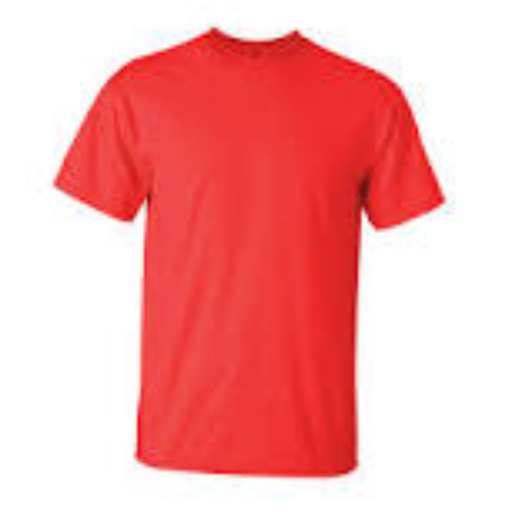

Top 5 Similar Images:


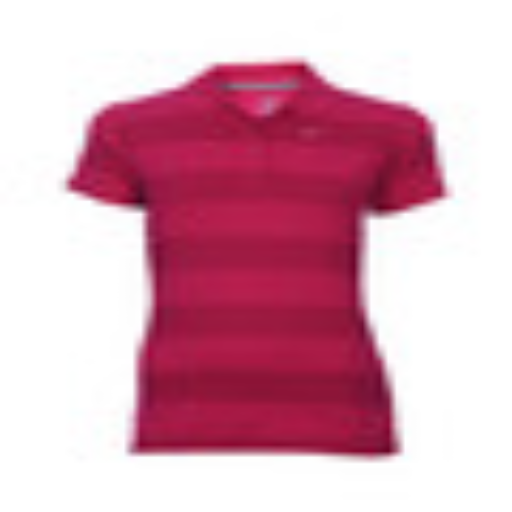

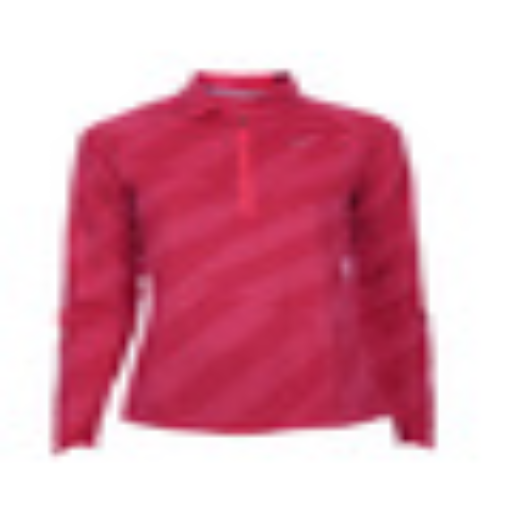

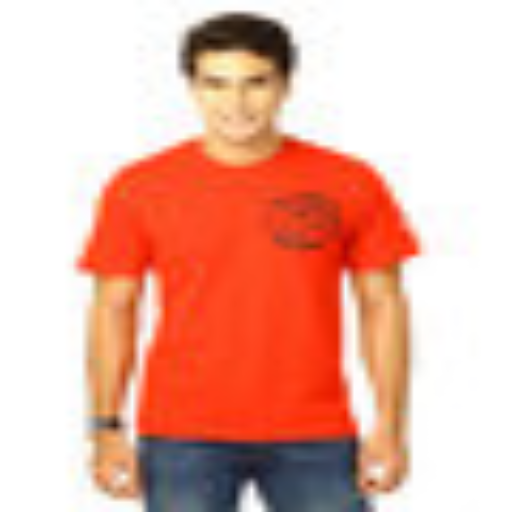

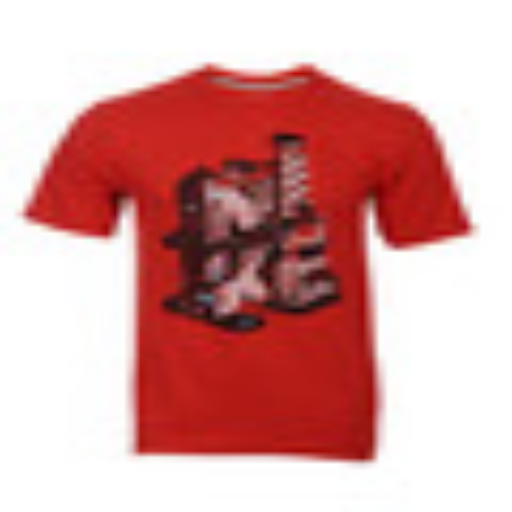

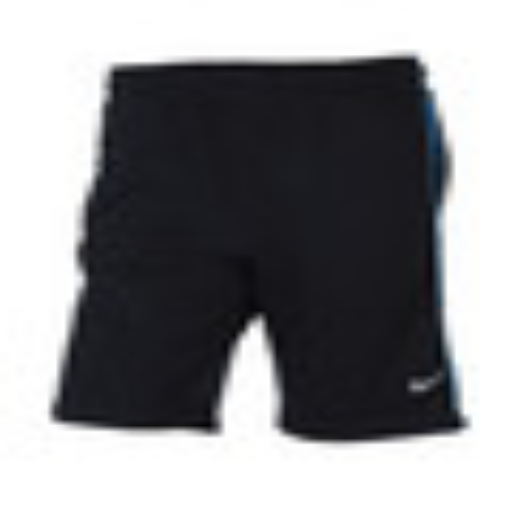

In [26]:
import pickle
import tensorflow as tf
import numpy as np
from numpy.linalg import norm
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import GlobalMaxPooling2D
from tensorflow.keras.applications import ResNet50, InceptionV3, VGG16, EfficientNetB0
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet_preprocess
from tensorflow.keras.applications.inception_v3 import preprocess_input as inception_preprocess
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg_preprocess
from tensorflow.keras.applications.efficientnet import preprocess_input as effnet_preprocess
from sklearn.neighbors import NearestNeighbors
from google.colab.patches import cv2_imshow  # For displaying images in Colab
from google.colab import files
import cv2
import os

# Load precomputed features and filenames
feature_list = np.array(pickle.load(open('Images_features.pkl', 'rb')))
filenames = pickle.load(open('filenames.pkl', 'rb'))

# Load models
resnet_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
inception_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
effnet_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Set models to non-trainable
resnet_model.trainable = False
inception_model.trainable = False
vgg_model.trainable = False
effnet_model.trainable = False

# Define feature extraction layers (Global Max Pooling)
resnet_model = tf.keras.Sequential([resnet_model, GlobalMaxPooling2D()])
inception_model = tf.keras.Sequential([inception_model, GlobalMaxPooling2D()])
vgg_model = tf.keras.Sequential([vgg_model, GlobalMaxPooling2D()])
effnet_model = tf.keras.Sequential([effnet_model, GlobalMaxPooling2D()])

# Function to extract features from all models for a single image
def extract_all_features(img_path):
    # Preprocess and extract features for each model
    img_resized_resnet = image.load_img(img_path, target_size=(224, 224))
    img_resized_inception = image.load_img(img_path, target_size=(299, 299))
    img_resized_vgg = image.load_img(img_path, target_size=(224, 224))
    img_resized_effnet = image.load_img(img_path, target_size=(224, 224))

    img_array_resnet = image.img_to_array(img_resized_resnet)
    img_array_inception = image.img_to_array(img_resized_inception)
    img_array_vgg = image.img_to_array(img_resized_vgg)
    img_array_effnet = image.img_to_array(img_resized_effnet)

    # Expand dimensions for model input
    img_array_resnet = np.expand_dims(img_array_resnet, axis=0)
    img_array_inception = np.expand_dims(img_array_inception, axis=0)
    img_array_vgg = np.expand_dims(img_array_vgg, axis=0)
    img_array_effnet = np.expand_dims(img_array_effnet, axis=0)

    # Preprocess the images for each model
    preprocessed_resnet = resnet_preprocess(img_array_resnet)
    preprocessed_inception = inception_preprocess(img_array_inception)
    preprocessed_vgg = vgg_preprocess(img_array_vgg)
    preprocessed_effnet = effnet_preprocess(img_array_effnet)

    # Extract features from each model
    resnet_features = resnet_model.predict(preprocessed_resnet).flatten()
    inception_features = inception_model.predict(preprocessed_inception).flatten()
    vgg_features = vgg_model.predict(preprocessed_vgg).flatten()
    effnet_features = effnet_model.predict(preprocessed_effnet).flatten()

    # Concatenate features from all models
    combined_features = np.concatenate([resnet_features, inception_features, vgg_features, effnet_features])
    return combined_features / norm(combined_features)  # Normalize the features

# Function to precompute features for the dataset
def precompute_features():
    dataset_features = []
    for img_path in filenames:
        features = extract_all_features(img_path)
        dataset_features.append(features)
    return np.array(dataset_features)

# Precompute features for the entire dataset and save them
print("Precomputing features for the dataset...")
dataset_features = precompute_features()

# Fit the Nearest Neighbors model with all models' features combined
neighbors = NearestNeighbors(n_neighbors=6, algorithm='brute', metric='euclidean')
neighbors.fit(dataset_features)

# Save the precomputed features to disk (this is optional, can be used for future runs)
pickle.dump(dataset_features, open('dataset_features.pkl', 'wb'))

# Let the user upload an image
print("Please upload an image for recommendation:")
uploaded = files.upload()

# Ensure an image is uploaded
if uploaded:
    # Get the uploaded file path
    user_image_path = list(uploaded.keys())[0]
    print(f"User-selected image: {user_image_path}")

    # Extract features for the uploaded image
    query_features = extract_all_features(user_image_path)

    # Find nearest neighbors for the uploaded image
    distances, indices = neighbors.kneighbors([query_features])

    # Display the uploaded image
    print("Uploaded Image:")
    query_img = cv2.imread(user_image_path)
    query_img_resized = cv2.resize(query_img, (512, 512))
    cv2_imshow(query_img_resized)

    # Display top 5 similar images
    print("Top 5 Similar Images:")
    for neighbor_idx in indices[0][1:6]:  # Skip the first index (it will be the uploaded image itself)
        similar_img = cv2.imread(filenames[neighbor_idx])
        similar_img_resized = cv2.resize(similar_img, (512, 512))
        cv2_imshow(similar_img_resized)


Training and Evaluating ResNet50...
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py:75: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


4/4 ━━━━━━━━━━━━━━━━━━━━ 21s 4s/step - accuracy: 0.6550 - loss: 0.7995
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 17s 4s/step - accuracy: 0.6456 - loss: 0.8205
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 21s 4s/step - accuracy: 0.6945 - loss: 0.7235
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 20s 4s/step - accuracy: 0.6268 - loss: 0.8517
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 17s 4s/step - accuracy: 0.6300 - loss: 0.8475
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 0.6560 - loss: 0.7986
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 21s 4s/step - accuracy: 0.6497 - loss: 0.8130
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 17s 4s/step - accuracy: 0.6789 - loss: 0.7537
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 20s 4s/step - accuracy: 0.6393 - loss: 0.8313
Epoch 10/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step - accuracy: 0.6185 - loss: 0.8721
4/4 ━━━━━━━━━━━━━━━━━━━━ 21s 5s/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Training and Evaluating InceptionV3...
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py:75: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


4/4 ━━━━━━━━━━━━━━━━━━━━ 29s 5s/step - accuracy: 0.3242 - loss: 1.2554
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 38s 5s/step - accuracy: 0.3700 - loss: 1.1701
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 41s 5s/step - accuracy: 0.3805 - loss: 1.1921
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 41s 5s/step - accuracy: 0.3794 - loss: 1.1775
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 24s 5s/step - accuracy: 0.3148 - loss: 1.2495
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 40s 5s/step - accuracy: 0.3284 - loss: 1.2500
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 40s 5s/step - accuracy: 0.3398 - loss: 1.2172
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 24s 5s/step - accuracy: 0.3607 - loss: 1.1911
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 22s 5s/step - accuracy: 0.3784 - loss: 1.1762
Epoch 10/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 41s 5s/step - accuracy: 0.3544 - loss: 1.2106
4/4 ━━━━━━━━━━━━━━━━━━━━ 29s 6s/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Training and Evaluating VGG16...
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py:75: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


4/4 ━━━━━━━━━━━━━━━━━━━━ 57s 13s/step - accuracy: 0.5175 - loss: 0.6984
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 84s 13s/step - accuracy: 0.4832 - loss: 0.6983
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 81s 13s/step - accuracy: 0.5300 - loss: 0.6968
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 56s 13s/step - accuracy: 0.4842 - loss: 0.7007
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 57s 13s/step - accuracy: 0.5102 - loss: 0.6989
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 81s 13s/step - accuracy: 0.5102 - loss: 0.7015
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 83s 13s/step - accuracy: 0.5061 - loss: 0.7004
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 56s 13s/step - accuracy: 0.5071 - loss: 0.7008
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 57s 13s/step - accuracy: 0.4957 - loss: 0.7010
Epoch 10/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 80s 13s/step - accuracy: 0.4665 - loss: 0.7033
4/4 ━━━━━━━━━━━━━━━━━━━━ 58s 13s/step
Training and Evaluating EfficientNetB0...
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py:75: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


4/4 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.6383 - loss: 0.7252
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.6175 - loss: 0.7676
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.6218 - loss: 0.7361
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.6695 - loss: 0.6788
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.6758 - loss: 0.6856
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.6465 - loss: 0.6894
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.6352 - loss: 0.7598
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.6508 - loss: 0.7229
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.6248 - loss: 0.7528
Epoch 10/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.6017 - loss: 0.7477
4/4 ━━━━━━━━━━━━━━━━━━━━ 13s 3s/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


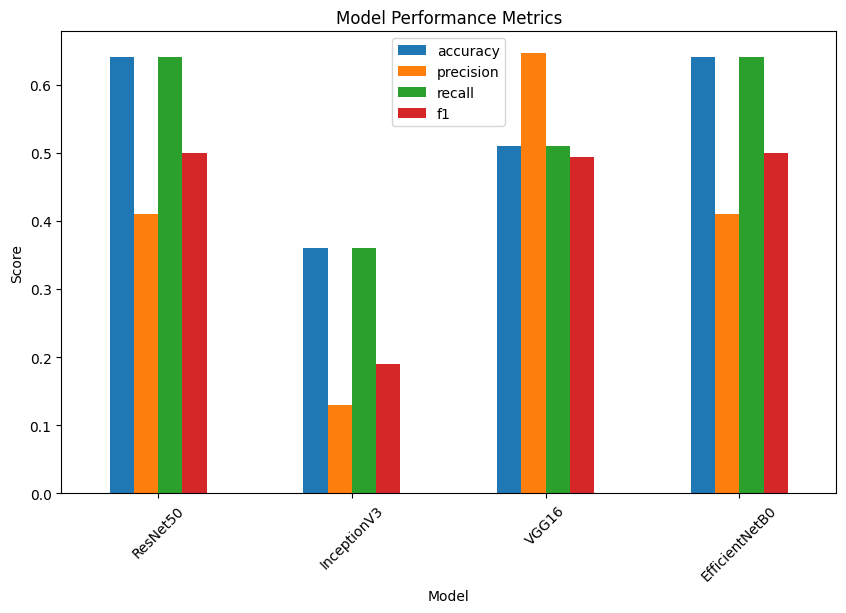

In [27]:
import pickle
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import GlobalMaxPooling2D, Dense, Flatten
from tensorflow.keras.applications import ResNet50, InceptionV3, VGG16, EfficientNetB0
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet_preprocess
from tensorflow.keras.applications.inception_v3 import preprocess_input as inception_preprocess
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg_preprocess
from tensorflow.keras.applications.efficientnet import preprocess_input as effnet_preprocess
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import NearestNeighbors
from numpy.linalg import norm
import matplotlib.pyplot as plt
from google.colab import files
import cv2

# Load precomputed features and filenames (if available)
try:
    feature_list = np.array(pickle.load(open('Images_features.pkl', 'rb')))
    filenames = pickle.load(open('filenames.pkl', 'rb'))
except FileNotFoundError:
    print("Feature files not found. Ensure you have precomputed features.")

# Function to create models with appropriate input sizes
def get_model(model_name):
    if model_name == 'ResNet50':
        base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    elif model_name == 'InceptionV3':
        base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))
    elif model_name == 'VGG16':
        base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    elif model_name == 'EfficientNetB0':
        base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    else:
        raise ValueError(f"Unknown model name: {model_name}")

    model = tf.keras.Sequential([
        base_model,
        GlobalMaxPooling2D(),
        Dense(128, activation='relu'),
        Dense(1, activation='sigmoid')  # Binary classification
    ])
    model.trainable = False  # Freeze layers for initial training
    return model

# Preprocessing function for models
def preprocess_image(img_path, model_name):
    if model_name == 'InceptionV3':
        img_size = (299, 299)
        preprocess = inception_preprocess
    else:
        img_size = (224, 224)
        preprocess = resnet_preprocess  # Works for ResNet50, VGG16, EfficientNetB0

    img = image.load_img(img_path, target_size=img_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    return preprocess(img_array)

# Function to train and evaluate a model
def train_and_evaluate_model(model_name, model, data, labels, epochs=10, batch_size=32):
    print(f"Training and Evaluating {model_name}...")

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(data, labels, epochs=epochs, batch_size=batch_size, verbose=1)

    predictions = model.predict(data)
    predictions = (predictions > 0.5).astype(int)

    accuracy = accuracy_score(labels, predictions)
    precision = precision_score(labels, predictions, average='weighted')
    recall = recall_score(labels, predictions, average='weighted')
    f1 = f1_score(labels, predictions, average='weighted')

    return accuracy, precision, recall, f1, history

# Image recommendation function
def recommend_similar_images(uploaded_img_path):
    uploaded_features = extract_features(uploaded_img_path, resnet_model)
    neighbors = NearestNeighbors(n_neighbors=6, algorithm='brute', metric='euclidean')
    neighbors.fit(feature_list)
    distances, indices = neighbors.kneighbors([uploaded_features])

    print("Uploaded Image:")
    uploaded_img = cv2.imread(uploaded_img_path)
    uploaded_img_resized = cv2.resize(uploaded_img, (512, 512))
    cv2.imshow('Uploaded Image', uploaded_img_resized)
    cv2.waitKey(0)

    print("Top 5 Recommended Images:")
    for idx in indices[0][1:6]:  # Skip the first as it will be the uploaded image
        similar_img = cv2.imread(filenames[idx])
        similar_img_resized = cv2.resize(similar_img, (512, 512))
        cv2.imshow('Recommended Image', similar_img_resized)
        cv2.waitKey(0)

# Example dataset
data = np.random.rand(100, 224, 224, 3)
labels = np.random.randint(0, 2, 100)

# Adjust data size for InceptionV3
data_inception = np.random.rand(100, 299, 299, 3)

# Training models
metrics = {}
for model_name in ['ResNet50', 'InceptionV3', 'VGG16', 'EfficientNetB0']:
    if model_name == 'InceptionV3':
        input_data = data_inception  # Use resized data for InceptionV3
    else:
        input_data = data

    model = get_model(model_name)
    accuracy, precision, recall, f1, history = train_and_evaluate_model(model_name, model, input_data, labels, epochs=10)
    metrics[model_name] = {'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1': f1}

# Plotting metrics
import pandas as pd
metrics_df = pd.DataFrame(metrics).T
metrics_df.plot(kind='bar', figsize=(10, 6))
plt.title('Model Performance Metrics')
plt.xlabel('Model')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()

# Image upload and recommendation
uploaded = files.upload()
if uploaded:
    uploaded_img_path = list(uploaded.keys())[0]
    recommend_similar_images(uploaded_img_path)
